# 호텔 리뷰 데이터 및 여행 특성 기반 <br>프랑스 파리 호텔 추천 시스템

* 프로젝트 기간: 2022.04.19 ~ 2022.04.25
* 팀명: 사조참치
* 팀원: 안지현(팀장), 허수정, 최선빈, 김동수, 김나리

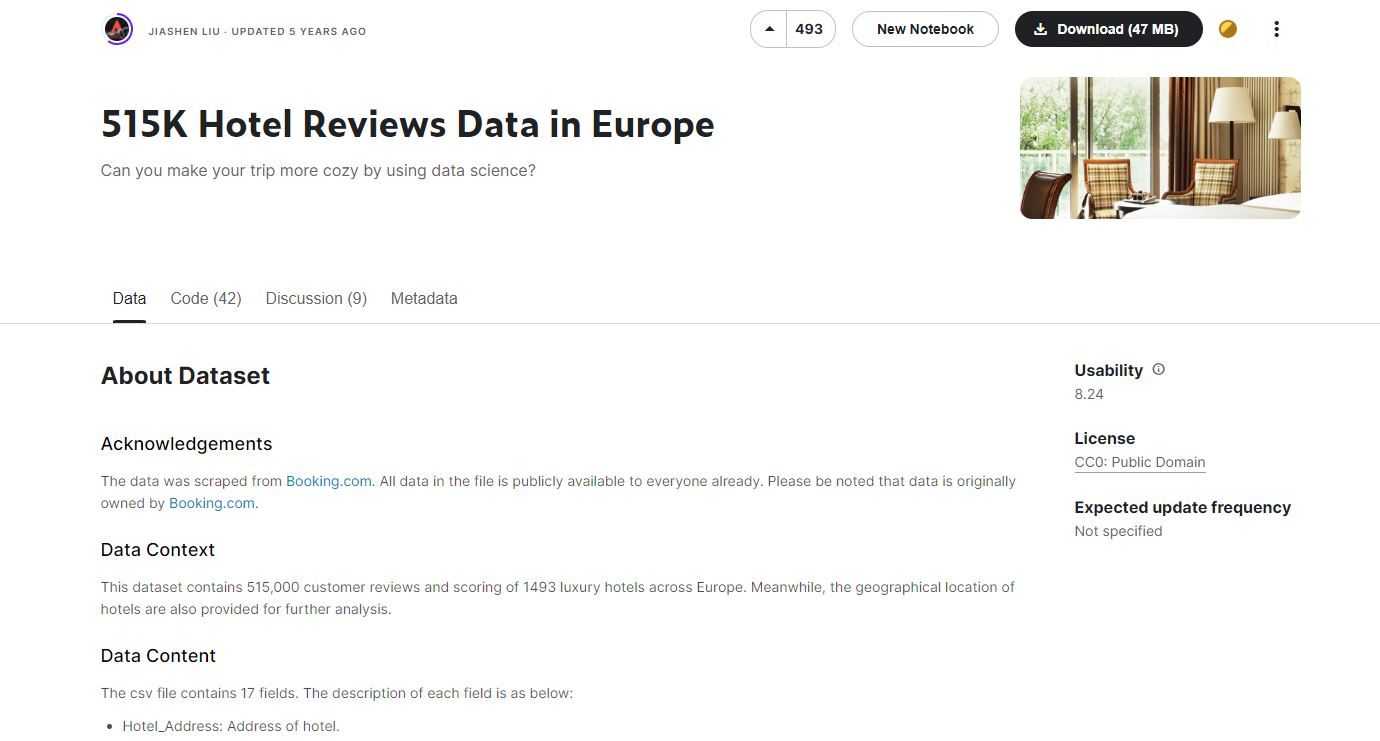 

# 캐글 데이터 참조 

- Hotel_Address: 호텔 주소입니다.
- Review_Date: 리뷰어가 해당 리뷰를 게시한 날짜입니다.
- Average_Score: 호텔의 평균 점수로, 작년의 최신 댓글을 기반으로 계산됩니다.
- Hotel_Name: 호텔 이름
- Reviewer_Nationality: 리뷰어의 국적
- Negative_Review: 리뷰어가 호텔에 제공한 부정적인 리뷰입니다. 리뷰어가 부정적인 - 리뷰를 제공하지 않으면 '네거티브 없음'이어야 합니다.
- Review_Total_Negative_Word_Counts: 부정적인 리뷰의 총 단어 수입니다.
- Positive_Review: 리뷰 작성자가 호텔에 제공한 긍정적인 리뷰입니다. 리뷰어가 부정- 적인 리뷰를 제공하지 않으면 '긍정 없음'이어야 합니다.
- Review_Total_Positive_Word_Counts: 긍정적인 리뷰의 총 단어 수입니다.
- Reviewer_Score: 리뷰어가 경험을 바탕으로 호텔에 부여한 점수
- Total_Number_of_Reviews_Reviewer_Has_Given : 리뷰어 가 과거에 제공한 리뷰  수입니다.
- Total Number of_Reviews: 호텔이 가지고 있는 유효한 리뷰의 총 수입니다.
- Tag: 리뷰어가 호텔에 부여한 태그.
- days_since_review : 검토 날짜와 스크랩 날짜 사이의 기간입니다.
- Additional_Number_of_Scoring : 후기가 아닌 서비스에 점수를 매겨주신 손님도 있습니다. 이 숫자는 검토 없이 유효한 점수가 몇 개 있는지 나타냅니다.
- lat: 호텔의 위도
- lng: 호텔의 경도

# 데이터 전처리

> 결측치 및 불용어 제거

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#텍스트 데이터 분석을 위한 라이브러리
import nltk

#민맥스 스케일러
from sklearn.preprocessing import MinMaxScaler


# 유사도 분석에 필요한 패키지
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk

import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# plt.rc('font', family = 'AppleGothic')
from wordcloud import WordCloud

In [4]:
df_origin = pd.read_csv('Hotel_Reviews_Paris.csv')
df = df_origin.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59928 entries, 0 to 59927
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               59928 non-null  object 
 1   Additional_Number_of_Scoring                59928 non-null  int64  
 2   Review_Date                                 59928 non-null  object 
 3   Average_Score                               59928 non-null  float64
 4   Hotel_Name                                  59928 non-null  object 
 5   Reviewer_Nationality                        59928 non-null  object 
 6   Negative_Review                             59928 non-null  object 
 7   Review_Total_Negative_Word_Counts           59928 non-null  int64  
 8   Total_Number_of_Reviews                     59928 non-null  int64  
 9   Positive_Review                             59928 non-null  object 
 10  Review_Tot

In [6]:
# 일부 호텔 위치 결측치 존재
#위도(lat), 경도(lng) 구글맵에서 가져옴
loc_dict = {'Mercure Paris Gare Montparnasse': (48.84011572182484, 2.3235939846102425),
                'Holiday Inn Paris Montmartre': (48.88903335011315, 2.3331738287894104),
                'Maison Albar Hotel Paris Op ra Diamond': (48.87537373008428, 2.323413455776034)}

df.loc[df['Hotel_Name'] == 'Mercure Paris Gare Montparnasse', 'lat'] = loc_dict['Mercure Paris Gare Montparnasse'][0]
df.loc[df['Hotel_Name'] == 'Mercure Paris Gare Montparnasse', 'lng'] = loc_dict['Mercure Paris Gare Montparnasse'][1]
df.loc[df['Hotel_Name'] == 'Holiday Inn Paris Montmartre', 'lat'] = loc_dict['Holiday Inn Paris Montmartre'][0]
df.loc[df['Hotel_Name'] == 'Holiday Inn Paris Montmartre', 'lng'] = loc_dict['Holiday Inn Paris Montmartre'][1]
df.loc[df['Hotel_Name'] == 'Maison Albar Hotel Paris Op ra Diamond', 'lat'] = loc_dict['Maison Albar Hotel Paris Op ra Diamond'][0]
df.loc[df['Hotel_Name'] == 'Maison Albar Hotel Paris Op ra Diamond', 'lng'] = loc_dict['Maison Albar Hotel Paris Op ra Diamond'][1]

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59928 entries, 0 to 59927
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               59928 non-null  object 
 1   Additional_Number_of_Scoring                59928 non-null  int64  
 2   Review_Date                                 59928 non-null  object 
 3   Average_Score                               59928 non-null  float64
 4   Hotel_Name                                  59928 non-null  object 
 5   Reviewer_Nationality                        59928 non-null  object 
 6   Negative_Review                             59928 non-null  object 
 7   Review_Total_Negative_Word_Counts           59928 non-null  int64  
 8   Total_Number_of_Reviews                     59928 non-null  int64  
 9   Positive_Review                             59928 non-null  object 
 10  Review_Tot

In [7]:
# 필요없는 열 없애기
df.drop(labels=['Additional_Number_of_Scoring',
'Review_Date',
'Review_Total_Negative_Word_Counts',
'Review_Total_Positive_Word_Counts',
'Total_Number_of_Reviews_Reviewer_Has_Given',
'Reviewer_Score'], axis = 1)

Hotel_Address  Average_Score  \
0        1 3 Rue d Argentine 16th arr 75116 Paris France            8.4   
1        1 3 Rue d Argentine 16th arr 75116 Paris France            8.4   
2        1 3 Rue d Argentine 16th arr 75116 Paris France            8.4   
3        1 3 Rue d Argentine 16th arr 75116 Paris France            8.4   
4        1 3 Rue d Argentine 16th arr 75116 Paris France            8.4   
...                                                  ...            ...   
59923  Place de l Op ra 4 rue Meyerbeer 9th arr 75009...            8.2   
59924  Place de l Op ra 4 rue Meyerbeer 9th arr 75009...            8.2   
59925  Place de l Op ra 4 rue Meyerbeer 9th arr 75009...            8.2   
59926  Place de l Op ra 4 rue Meyerbeer 9th arr 75009...            8.2   
59927  Place de l Op ra 4 rue Meyerbeer 9th arr 75009...            8.2   

                Hotel_Name Reviewer_Nationality  \
0      Monhotel Lounge SPA              Brazil    
1      Monhotel Lounge SPA          Luxembourg    
2      Monhotel Lounge SPA      United Kingdom    
3      Monhotel Lounge SPA             Belgium    
4      Monhotel Lounge SPA               Qatar    
...                    ...                  ...   
59923        W Paris Op ra              Norway    
59924        W Paris Op ra               China    
59925        W Paris Op ra               China    
59926        W Paris Op ra           Indonesia    
59927        W Paris Op ra      United Kingdom    

                                         Negative_Review  \
0                                            No Negative   
1       Not only did the staff on arrival ask to copy...   
2                                                    N A   
3       The sauna is a wonderfull addition it s a sha...   
4       They have maintenance and I couldn t enjoy th...   
...                                                  ...   
59923                  The breakfast is way to expensive   
59924                                        No Negative   
59925   they lost our reservation when we arrived the...   
59926                                            Nothing   
59927                                        No Negative   

       Total_Number_of_Reviews  \
0                          171   
1                          171   
2                          171   
3                          171   
4                          171   
...                        ...   
59923                      150   
59924                      150   
59925                      150   
59926                      150   
59927                      150   

                                         Positive_Review  \
0       Nice hotel Room was beautiful and bed very co...   
1                                            No Positive   
2       Fantastic weekend with my partner We Would de...   
3       Good location really good breakfast maybe the...   
4       I asked to be downgraded because I was paying...   
...                                                  ...   
59923               The straff service room and interi r   
59924             The staffs are helpful for everything    
59925                          the location is very good   
59926     Location and all the staff are really helpfull   
59927             location and friendliness of the staff   

                                                    Tags days_since_review  \
0      [' Leisure trip ', ' Group ', ' Comfort Double...           35 days   
1      [' Business trip ', ' Solo traveler ', ' Super...           100 day   
2      [' Leisure trip ', ' Couple ', ' Premium Doubl...           107 day   
3      [' Business trip ', ' Solo traveler ', ' Super...           265 day   
4      [' Business trip ', ' Solo traveler ', ' Delux...           340 day   
...                                                  ...               ...   
59923  [' Leisure trip ', ' Family with older childre...           652 day   
59924  [' Leisure trip ', ' Solo traveler ', ' Cozy R.

> 긍정/부정 리뷰 탐색

In [8]:
from tqdm import tqdm

processed_df = df.copy()
review_df = processed_df[['Hotel_Name','Negative_Review','Positive_Review']]

# 리뷰 뭉치 담을 빈 데이터프레임 생성
review_corpus_df = pd.DataFrame(columns=['Hotel_Name','Negative_Reviews','Positive_Reviews'])
#호텔이름 담은 리스트
hotel_list = review_df['Hotel_Name'].unique().tolist()

# 호텔 이름 하나 꺼내와서 -> (그 호텔에 해당하는 df만 필터링 해온 후, 각각 리스트로 만듦. 
# 그리고 딕셔너리로 만들어서 이전에 만들어 둔 빈 데이터프레임에 덮어쓰지 않게 append해줌.) 
for hotel in tqdm(hotel_list):
    negative_review = "".join(review_df[(review_df['Hotel_Name']==hotel)]['Negative_Review'].tolist())
    positive_review = "".join(review_df[(review_df['Hotel_Name']==hotel)]['Positive_Review'].tolist())
    dic = {'Hotel_Name':hotel,'Negative_Reviews':negative_review,'Positive_Reviews':positive_review}
    review_corpus_df = review_corpus_df.append(dic,ignore_index=True)

100%|████████████████████████████████████████████████████████████████████████████████| 458/458 [00:43<00:00, 10.45it/s]


In [7]:
review_corpus_df.head()

Hotel_Name  \
0              Monhotel Lounge SPA   
1               Kube Hotel Ice Bar   
2                  Splendid Etoile   
3        Hotel Trianon Rive Gauche   
4  Novotel Suites Paris Nord 18 me   

                                    Negative_Reviews  \
0  No Negative Not only did the staff on arrival ...   
1   The hotel is situated in the worst area of Pa...   
2   Restaurant and bar closed Sunday evening not ...   
3   I can t find any faults  There were no outlet...   
4   As I said the coffee maker didn t work Apart ...   

                                    Positive_Reviews  
0   Nice hotel Room was beautiful and bed very co...  
1  No Positive Room was very modern spacious Bed ...  
2   Excellent location Staff was incredible every...  
3   This is the third time we stayed at this hote...  
4   Perfect location for the Stade de France and ...

# 유사도 분석

In [9]:
df = pd.read_csv('Hotel_Reviews_Paris_edicted.csv')

df['Tags'] = df['Tags'].apply(lambda x: x.strip('[]').split(" ', ' "))
# print(type(df['Tags'][0]))
df.fillna(' ', inplace = True)

df2 = pd.read_csv('data_corpus.csv')

df2 = df2.set_index('Hotel_Name')

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

positive_list = df2['Positive']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(positive_list).todense()
# X.shape # 458개의 호텔 / 16737개의 단어
Similarity_positive = pd.DataFrame(cosine_similarity( X , X ))

Similarity_positive.columns = list(positive_list.index)
Similarity_positive.index = list(positive_list.index)

# Similarity_positive  # nltk 처리하지 않은 유사도 행렬 : Positive Review

> Naive(Positive)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

positive_list = df2['Positive']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(positive_list).todense()
# X.shape # 458개의 호텔 / 16737개의 단어
Similarity_positive = pd.DataFrame(cosine_similarity( X , X ))

Similarity_positive.columns = list(positive_list.index)
Similarity_positive.index = list(positive_list.index)

Similarity_positive  # nltk 처리하지 않은 유사도 행렬 : Positive Review

1K Hotel  9Hotel Republique  \
1K Hotel                                      1.000000           0.941560   
9Hotel Republique                             0.941560           1.000000   
A La Villa Madame                             0.898725           0.922715   
AC Hotel Paris Porte Maillot by Marriott      0.933238           0.940250   
Acad mie H tel Saint Germain                  0.939641           0.954221   
...                                                ...                ...   
Waldorf Madeleine                             0.949801           0.954324   
Warwick Paris Former Warwick Champs Elysees   0.947925           0.927440   
Westside Arc de Triomphe Hotel                0.947119           0.949916   
Windsor Opera                                 0.834846           0.867553   
XO Hotel                                      0.824015           0.854351   

                                              A La Villa Madame  \
1K Hotel                                               0.898725   
9Hotel Republique                                      0.922715   
A La Villa Madame                                      1.000000   
AC Hotel Paris Porte Maillot by Marriott               0.904159   
Acad mie H tel Saint Germain                           0.932293   
...                                                         ...   
Waldorf Madeleine                                      0.921509   
Warwick Paris Former Warwick Champs Elysees            0.904358   
Westside Arc de Triomphe Hotel                         0.916147   
Windsor Opera                                          0.830813   
XO Hotel                                               0.838878   

                                              AC Hotel Paris Porte Maillot by Marriott  \
1K Hotel                                                                      0.933238   
9Hotel Republique                                                             0.940250   
A La Villa Madame                                                             0.904159   
AC Hotel Paris Porte Maillot by Marriott                                      1.000000   
Acad mie H tel Saint Germain                                                  0.938807   
...                                                                                ...   
Waldorf Madeleine                                                             0.940589   
Warwick Paris Former Warwick Champs Elysees                                   0.933011   
Westside Arc de Triomphe Hotel                                                0.947215   
Windsor Opera                                                                 0.832598   
XO Hotel                                                                      0.830500   

                                              Acad mie H tel Saint Germain  \
1K Hotel                                                          0.939641   
9Hotel Republique                                                 0.954221   
A La Villa Madame                                                 0.932293   
AC Hotel Paris Porte Maillot by Marriott                          0.938807   
Acad mie H tel Saint Germain                                      1.000000   
...                                                                    ...   
Waldorf Madeleine                                                 0.971283   
Warwick Paris Former Warwick Champs Elysees                       0.947448   
Westside Arc de Triomphe Hotel                                    0.964934   
Windsor Opera                                                     0.893524   
XO Hotel                                                          0.875355   

                                              Amarante Beau Manoir  \
1K Hotel                                                  0.944171   
9Hotel Republique                                         0.933784   
A La Villa Madame                                         0.912473   
AC Hotel Paris Por

> Using nltk(Positive)

In [12]:
from nltk.corpus import stopwords

stopWords = stopwords.words('english')
stopWords.append(',')
stopWords.append('.')

positive_list2 = df2['Positive'].copy()
for i in positive_list2:
    index = list(positive_list2).index(i)
    sentence = nltk.word_tokenize(i)
    positive_list2[index] = sentence

null_list = []
for i in range(458):    # 0~457
    sentence_list = positive_list2[i]
    result = ''
    a = 0
    for i in sentence_list:   # 'the', 'bus'
        if i not in stopWords:
            result = result + i + ' '
    null_list.append(result)

df3 = df2.copy()
df3['Positive'] = null_list

Y = vectorizer.fit_transform(df3['Positive']).todense()
# Y.shape # 458개의 호텔 / 16713개의 단어

Similarity_positive_nltk = pd.DataFrame(cosine_similarity(Y , Y))
Similarity_positive_nltk.columns = list(df3['Positive'].index)
Similarity_positive_nltk.index = list(df3['Positive'].index)

Similarity_positive_nltk  # nltk 처리 후 유사도 행렬 : Positive Review

1K Hotel  9Hotel Republique  \
1K Hotel                                      1.000000           0.865180   
9Hotel Republique                             0.865180           1.000000   
A La Villa Madame                             0.719199           0.773331   
AC Hotel Paris Porte Maillot by Marriott      0.800861           0.850478   
Acad mie H tel Saint Germain                  0.857984           0.868144   
...                                                ...                ...   
Waldorf Madeleine                             0.876161           0.858798   
Warwick Paris Former Warwick Champs Elysees   0.823235           0.787069   
Westside Arc de Triomphe Hotel                0.842421           0.874083   
Windsor Opera                                 0.720417           0.713931   
XO Hotel                                      0.650010           0.625939   

                                              A La Villa Madame  \
1K Hotel                                               0.719199   
9Hotel Republique                                      0.773331   
A La Villa Madame                                      1.000000   
AC Hotel Paris Porte Maillot by Marriott               0.721675   
Acad mie H tel Saint Germain                           0.785439   
...                                                         ...   
Waldorf Madeleine                                      0.725589   
Warwick Paris Former Warwick Champs Elysees            0.700935   
Westside Arc de Triomphe Hotel                         0.733035   
Windsor Opera                                          0.572318   
XO Hotel                                               0.542758   

                                              AC Hotel Paris Porte Maillot by Marriott  \
1K Hotel                                                                      0.800861   
9Hotel Republique                                                             0.850478   
A La Villa Madame                                                             0.721675   
AC Hotel Paris Porte Maillot by Marriott                                      1.000000   
Acad mie H tel Saint Germain                                                  0.839315   
...                                                                                ...   
Waldorf Madeleine                                                             0.821838   
Warwick Paris Former Warwick Champs Elysees                                   0.784961   
Westside Arc de Triomphe Hotel                                                0.841186   
Windsor Opera                                                                 0.675337   
XO Hotel                                                                      0.621420   

                                              Acad mie H tel Saint Germain  \
1K Hotel                                                          0.857984   
9Hotel Republique                                                 0.868144   
A La Villa Madame                                                 0.785439   
AC Hotel Paris Porte Maillot by Marriott                          0.839315   
Acad mie H tel Saint Germain                                      1.000000   
...                                                                    ...   
Waldorf Madeleine                                                 0.911710   
Warwick Paris Former Warwick Champs Elysees                       0.872309   
Westside Arc de Triomphe Hotel                                    0.890210   
Windsor Opera                                                     0.746631   
XO Hotel                                                          0.626961   

                                              Amarante Beau Manoir  \
1K Hotel                                                  0.839990   
9Hotel Republique                                         0.845210   
A La Villa Madame                                         0.726365   
AC Hotel Paris Por

> Negative(Naive)

In [13]:
negative_list = df2['Negative']

vectorizer = CountVectorizer()
X2 = vectorizer.fit_transform(negative_list).todense()
# X.shape # (458, 35828)

Similarity_negative = pd.DataFrame(cosine_similarity( X2 , X2 ))

Similarity_negative.columns = list(negative_list.index)
Similarity_negative.index = list(negative_list.index)

Similarity_negative.head(3)  # nltk 처리하지 않은 유사도 행렬 : Positive Review

1K Hotel  9Hotel Republique  A La Villa Madame  \
1K Hotel           1.000000           0.944430           0.794557   
9Hotel Republique  0.944430           1.000000           0.839413   
A La Villa Madame  0.794557           0.839413           1.000000   

                   AC Hotel Paris Porte Maillot by Marriott  \
1K Hotel                                           0.894593   
9Hotel Republique                                  0.871074   
A La Villa Madame                                  0.735151   

                   Acad mie H tel Saint Germain  Amarante Beau Manoir  \
1K Hotel                               0.946246              0.962516   
9Hotel Republique                      0.950911              0.941879   
A La Villa Madame                      0.825245              0.797430   

                   Amarante Champs Elys es    Amp re    Arioso  \
1K Hotel                          0.951093  0.940012  0.862877   
9Hotel Republique                 0.923957  0.939407  0.874096   
A La Villa Madame                 0.774671  0.804079  0.784818   

                   Artus Hotel by MH  ...  Villa Montparnasse  \
1K Hotel                    0.872876  ...            0.905435   
9Hotel Republique           0.869849  ...            0.876319   
A La Villa Madame           0.740990  ...            0.737235   

                   Villa Opera Drouot  Villa Panth on  Villa d Estr es  \
1K Hotel                     0.945177        0.967692         0.852149   
9Hotel Republique            0.935302        0.957031         0.824722   
A La Villa Madame            0.799313        0.814964         0.724652   

                   W Paris Op ra  Waldorf Madeleine  \
1K Hotel                0.884744           0.931493   
9Hotel Republique       0.871446           0.945406   
A La Villa Madame       0.717423           0.829942   

                   Warwick Paris Former Warwick Champs Elysees   \
1K Hotel                                               0.957542   
9Hotel Republique                                      0.945492   
A La Villa Madame                                      0.795685   

                   Westside Arc de Triomphe Hotel  Windsor Opera  XO Hotel  
1K Hotel                                 0.968698       0.822894  0.719544  
9Hotel Republique                        0.959783       0.816210  0.698287  
A La Villa Madame                        0.818073       0.690637  0.613622  

[3 rows x 458 columns]

> NLTK Negative

In [14]:
negative_list2 = df2['Negative'].copy()
for i in negative_list2:
    index = list(negative_list2).index(i)
    sentence = nltk.word_tokenize(i)
    negative_list2[index] = sentence

null_list = []
for i in range(458):    # 0~457
    sentence_list = negative_list2[i]
    result = ''
    a = 0
    for i in sentence_list:   # 'the', 'bus'
        if i not in stopWords:
            result = result + i + ' '
    null_list.append(result)

df3['Negative'] = null_list

Y2 = vectorizer.fit_transform(df3['Negative']).todense()
# Y.shape # (458, 35806)

Similarity_negative_nltk = pd.DataFrame(cosine_similarity(Y2 , Y2))
Similarity_negative_nltk.columns = list(df3['Negative'].index)
Similarity_negative_nltk.index = list(df3['Negative'].index)

Similarity_negative_nltk  # nltk 처리 후 유사도 행렬 : Positive Review

1K Hotel  9Hotel Republique  \
1K Hotel                                      1.000000           0.709611   
9Hotel Republique                             0.709611           1.000000   
A La Villa Madame                             0.490952           0.644467   
AC Hotel Paris Porte Maillot by Marriott      0.649477           0.622228   
Acad mie H tel Saint Germain                  0.745835           0.812962   
...                                                ...                ...   
Waldorf Madeleine                             0.725043           0.793345   
Warwick Paris Former Warwick Champs Elysees   0.746969           0.776669   
Westside Arc de Triomphe Hotel                0.777843           0.827324   
Windsor Opera                                 0.500787           0.538285   
XO Hotel                                      0.390017           0.295665   

                                              A La Villa Madame  \
1K Hotel                                               0.490952   
9Hotel Republique                                      0.644467   
A La Villa Madame                                      1.000000   
AC Hotel Paris Porte Maillot by Marriott               0.438240   
Acad mie H tel Saint Germain                           0.594819   
...                                                         ...   
Waldorf Madeleine                                      0.598386   
Warwick Paris Former Warwick Champs Elysees            0.540750   
Westside Arc de Triomphe Hotel                         0.623645   
Windsor Opera                                          0.365028   
XO Hotel                                               0.230992   

                                              AC Hotel Paris Porte Maillot by Marriott  \
1K Hotel                                                                      0.649477   
9Hotel Republique                                                             0.622228   
A La Villa Madame                                                             0.438240   
AC Hotel Paris Porte Maillot by Marriott                                      1.000000   
Acad mie H tel Saint Germain                                                  0.673369   
...                                                                                ...   
Waldorf Madeleine                                                             0.651734   
Warwick Paris Former Warwick Champs Elysees                                   0.645268   
Westside Arc de Triomphe Hotel                                                0.687487   
Windsor Opera                                                                 0.408740   
XO Hotel                                                                      0.363027   

                                              Acad mie H tel Saint Germain  \
1K Hotel                                                          0.745835   
9Hotel Republique                                                 0.812962   
A La Villa Madame                                                 0.594819   
AC Hotel Paris Porte Maillot by Marriott                          0.673369   
Acad mie H tel Saint Germain                                      1.000000   
...                                                                    ...   
Waldorf Madeleine                                                 0.836998   
Warwick Paris Former Warwick Champs Elysees                       0.800379   
Westside Arc de Triomphe Hotel                                    0.836916   
Windsor Opera                                                     0.544963   
XO Hotel                                                          0.419688   

                                              Amarante Beau Manoir  \
1K Hotel                                                  0.763522   
9Hotel Republique                                         0.726840   
A La Villa Madame                                         0.522378   
AC Hotel Paris Por

# 호텔 리뷰 데이터 분석

> 긍정 리뷰 데이터 속 키워드 count

In [27]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv('data_corpus.csv',encoding='utf-8')

In [16]:
def make_word_counts(corpus):
   
    stopWords = stopwords.words("english")
    stopWords.append(',')
    stopWords.append('.')
    stopWords.append('’')
    stopWords.append('”')
    stopWords.append('—')
    #del_list = ['hotel','bit','day','nothing','thing','problem','paris','ok','number','get','need']
    #stopWords.extend(del_list)
    
    tokenized = nltk.word_tokenize(corpus)
    lemmatizer = nltk.wordnet.WordNetLemmatizer()
    lemmas = []  
    for token in tokenized:  
        if token not in stopWords: 
            lemmas.append(lemmatizer.lemmatize(token))

    postags = nltk.pos_tag(lemmas)

    noun_list = []
    for word, tag in postags:
        if tag.startswith('N'):    
            noun_list.append(word.lower())

    counts = Counter(noun_list)
    return counts

In [17]:
# 빈 리스트 생성
hotel_word_dict = {}

for i in range(len(df['Hotel_Name'].tolist())):
    
    #idx==i인 호텔명
    hotel = df['Hotel_Name'][i]
    #해당호텔의 단어빈도 dict
    counts = make_word_counts(df['Positive'][i])
    
    #보기 편하게 dict로 type 변경
    hotel_word_dict[hotel] = dict(counts)

#호텔:{단어:빈도} - dict in dict 형태
hotel_word_dict

{'1K Hotel': {'location': 34,
  'marais': 8,
  'arrondissement': 1,
  'fitness': 2,
  'room': 62,
  'bed': 4,
  'staff': 33,
  'cleanliness': 2,
  'hotel': 34,
  'installation': 1,
  'breakfast': 8,
  'time': 2,
  'excellentgreat': 1,
  'metro': 11,
  'station': 4,
  'journey': 1,
  'centre': 2,
  'parisnice': 1,
  'decent': 2,
  'service': 5,
  'close': 1,
  'bus': 1,
  'reach': 1,
  'area': 7,
  'city': 1,
  'well': 2,
  'nobody': 1,
  'position': 1,
  'transport': 1,
  'excellent': 2,
  'so': 1,
  'paris': 9,
  'everything': 4,
  'change': 2,
  'road': 1,
  'window': 4,
  'night': 4,
  'sleep': 1,
  'restaurant': 8,
  'premise': 1,
  'funky': 1,
  'club': 1,
  'surpriseroom': 1,
  'design': 7,
  'bathroom': 12,
  'bit': 1,
  'head': 1,
  'holder': 1,
  'work': 3,
  'all': 1,
  'europe': 1,
  'nice': 5,
  'lot': 5,
  'distance': 3,
  'la': 1,
  'district': 3,
  'site': 2,
  'buffet': 1,
  'clean': 5,
  'rooma': 1,
  'explore': 1,
  'bar': 7,
  'market': 1,
  'place': 4,
  'absolute':

In [18]:
#호텔 리스트 확인
list(hotel_word_dict.keys())
#1개 호텔의 단어 리스트 확인
list(hotel_word_dict['1K Hotel'].keys())

['location',
 'marais',
 'arrondissement',
 'fitness',
 'room',
 'bed',
 'staff',
 'cleanliness',
 'hotel',
 'installation',
 'breakfast',
 'time',
 'excellentgreat',
 'metro',
 'station',
 'journey',
 'centre',
 'parisnice',
 'decent',
 'service',
 'close',
 'bus',
 'reach',
 'area',
 'city',
 'well',
 'nobody',
 'position',
 'transport',
 'excellent',
 'so',
 'paris',
 'everything',
 'change',
 'road',
 'window',
 'night',
 'sleep',
 'restaurant',
 'premise',
 'funky',
 'club',
 'surpriseroom',
 'design',
 'bathroom',
 'bit',
 'head',
 'holder',
 'work',
 'all',
 'europe',
 'nice',
 'lot',
 'distance',
 'la',
 'district',
 'site',
 'buffet',
 'clean',
 'rooma',
 'explore',
 'bar',
 'market',
 'place',
 'absolute',
 'grab',
 'lunch',
 'amongst',
 'exception',
 'polite',
 'stay',
 'need',
 'travelinggreat',
 'wonderful',
 'loved',
 'lobby',
 'comfortablethe',
 'access',
 'transportation',
 'center',
 'adequate',
 'equipment',
 'food',
 'experiencequiethuge',
 'light',
 'trip',
 'ranked

In [19]:
#7개 키워드의 호텔별 빈도 담을 df 생성
keyword_df = pd.DataFrame(columns=['Hotel_Name','room' ,'clean','staff','service','design','location','breakfast'])

#호텔명 1개씩 꺼내와서
for hotel in tqdm(list(hotel_word_dict.keys())):
    
    #해당 호텔의 단어빈도dict
    word_dic = hotel_word_dict[hotel]
    #7개 키워드(임시)
    keywords = ['room' ,'clean','staff','service','design','location','breakfast']
    
    #키워드 1개씩 꺼내와서
    for keyword in keywords:
        #호텔이 가진 단어 중에 키워드가 있으면
        if keyword in list(word_dic.keys()):
            #해당 호텔에서 키워드가 등장하는 빈도 dict로 저장
            dic = {'Hotel_Name':hotel,keyword:int(word_dic[keyword])}
            #이전 셀에서 만든 df에 추가
            keyword_df = keyword_df.append(dic,ignore_index=True)
        else:
            None

100%|████████████████████████████████████████████████████████████████████████████████| 458/458 [00:10<00:00, 45.57it/s]


In [20]:
#결측치 0으로 처리           
keyword_df = keyword_df.fillna(0)  
keyword_df = keyword_df.pivot_table(index='Hotel_Name',aggfunc='sum');keyword_df

breakfast  clean  design  \
Hotel_Name                                                               
1K Hotel                                              8      5       7   
9Hotel Republique                                    25      8      14   
A La Villa Madame                                     9      1       2   
AC Hotel Paris Porte Maillot by Marriott              7      3       0   
Acad mie H tel Saint Germain                         15      6       0   
...                                                 ...    ...     ...   
Waldorf Madeleine                                    16      8       2   
Warwick Paris Former Warwick Champs Elysees          28      4       1   
Westside Arc de Triomphe Hotel                       30     12       0   
Windsor Opera                                         1      3       0   
XO Hotel                                              1      0       1   

                                              location  room  service  staff  
Hotel_Name                                                                    
1K Hotel                                            34    62        5     33  
9Hotel Republique                                   36    55        7     67  
A La Villa Madame                                   10     9        3     11  
AC Hotel Paris Porte Maillot by Marriott            16    16        1     26  
Acad mie H tel Saint Germain                        95    84        7    112  
...                                                ...   ...      ...    ...  
Waldorf Madeleine                                  101    82       11     79  
Warwick Paris Former Warwick Champs Elysees        129    62       17     82  
Westside Arc de Triomphe Hotel                      72    75       12    108  
Windsor Opera                                        8     8        0     11  
XO Hotel                                             3     4        1      3  

[458 rows x 7 columns]

# 호텔 태그 데이터 분석

>Tags 열 재분류

In [21]:
import csv
import pandas as pd
df = pd.read_csv('Hotel_Reviews_Paris_edicted.csv')

df['Tags']
df['Tags'].value_counts()
tags = df['Tags'].apply(lambda x: eval(x)[:5])
df[['Trip_type','Group_type','Room_type','Days','Device']] = pd.DataFrame(tags.tolist())
df[['Trip_type','Group_type','Room_type','Days','Device']]
save2csv = df[['Trip_type','Group_type','Room_type','Days','Device']]
save2csv.to_csv("Tags_data_final1.csv", mode='w', header=True, index=False) 
# Tags 열을 데이터 분류에 맞춰 5개의 열로 분리

> Trip_type 열 (Leisure, Business )<br>
입력 순서가 지켜지지 않은 행 NaN처리

In [22]:
df = pd.read_csv('Tags_data_final1.csv') # Tags 열을 분리해서 df로 만든 csv
df = df.drop(['Room_type','Days','Device'], axis=1) #불필요한 열 삭제

Trip_col = df['Trip_type']
not_trip = df[~df['Trip_type'].str.contains('trip')] 
# df 내에 'Trip_type' 열 중에서 'trip'을 포함하지 않는(~ : not) df 형태로 출력
for idx in range(len(not_trip)): # 3번째 줄 not_trip의 길이만큼 반복하는 idx
    df['Trip_type'][not_trip.index[idx]] = np.NaN 
    # df의 'Trip_type'열에서 trip을 포함하지 않는 index 번째 행을 np.NaN으로 변경
df['Trip_type'] = df['Trip_type'].replace(' Leisure trip ','Leisure trip')
df['Trip_type'] = df['Trip_type'].replace(' Business trip ','Business trip')
# Columns name 중 공백 발견. replace로 변경.
df['Trip_type'].value_counts(dropna=False) #요소 개수 세기(dropna=False 시 NaN 값도 출력)

Leisure trip     48613
Business trip     9713
NaN               1602
Name: Trip_type, dtype: int64

> Group_type 열
Couple, single -> Couple<br>
Family with young children, older children -> With_children<br>
Group, Travelers with friends -> Group<br>

In [23]:
df['Group_type'] = df['Group_type'].replace(' Solo traveler ','Couple')
df['Group_type'] = df['Group_type'].replace(' Couple ','Couple')
df['Group_type'] = df['Group_type'].replace(' Family with young children ','With_children')
df['Group_type'] = df['Group_type'].replace(' Family with older children ','With_children')
df['Group_type'] = df['Group_type'].replace(' Travelers with friends ','Group')
df['Group_type'] = df['Group_type'].replace(' Group ','Group')
# Columns name 중 공백 제거 replace로 변경.

not_group = df[~df['Group_type'].str.contains('Couple|With_children|Group')]
# not_group : df의 df'Group_type' 열 중 Couple or With_children or Group을 포함하지 않는 경우

print(not_group.loc[:,])    #전체 데이터 확인
print(not_group.index[1]) #not_group의 두번째[1] index 값 확인

for idx2 in range(len(not_group)): #not_group의 길이만큼
#     print()
    df['Group_type'][not_group.index[idx2]] = np.NaN #not_group을 가진 index를 찾아서 행 전체를 np.NaN

    df['Group_type'].value_counts(dropna=False) #확인
df.isnull().sum() #결측치 확인

donda= df[['Trip_type','Group_type']] #trip,group type열을 선택
donda.to_csv("Tags_data_NaN.csv", mode='w', header=True, index=False) 
# Trip_type, Group_type 열만을 csv로 저장, header(열이름) 살리기 index 번호 지우기

           Trip_type                  Group_type
1      Business trip               Solo traveler
3      Business trip               Solo traveler
4      Business trip               Solo traveler
5       Leisure trip               Solo traveler
7      Business trip               Solo traveler
...              ...                         ...
59918   Leisure trip               Solo traveler
59922            NaN       Wonderful Double Room
59923   Leisure trip  Family with older children
59924   Leisure trip               Solo traveler
59926   Leisure trip  Family with young children

[26365 rows x 2 columns]
3


>비지니스 호텔 비율 구하기

In [24]:
df_e = pd.read_csv('Hotel_Reviews_Paris_edicted.csv')
df_e = df_e.drop(['Hotel_Address','Average_Score','Reviewer_Nationality','Total_Number_of_Reviews','Positive_Review','Negative_Review','lat','lng'], axis=1)
# 여행 목적(business, leisure trup) 이 담긴 Tags 열과 Hotel_Name 열에 집중
df_e.to_csv("edited_name_tags.csv", mode='w', header=True, index=False) # 필요한 Hotel_Name을 위해

df_n = pd.read_csv('edited_name_tags.csv')
re_df = pd.concat([df_n,df], axis=1)
# df_n : Hotel_name, Tags csv
# df : Trip_type, Group_type csv
#.concat 으로 결합 axis=1 : 열 방향으로 결합
re_df=re_df.drop(['Tags'], axis=1) #태그 열 삭제  #Hotel_name, Trip_type, Group_type
re_df['Hotel_Name'].value_counts(dropna=False) #호텔 이름 빈도수 체크
Hotel_index = re_df['Hotel_Name'].value_counts(dropna=False).index #각 호텔 이름들의 index 저장
len(Hotel_index) # 총 갯수 458
# hotel_list = Hotel_index.tolist()
# hotel_list[0] #'Mercure Paris Terminus Nord'
# Hotel_index[0] #'Mercure Paris Terminus Nord'

for idx_hotel in range(len(Hotel_index)): #호텔 갯수 458개만큼 idx_hotel
    print(re_df['Trip_type'][idx_hotel]) #trip type 출력 확인
re_df['Hotel_Name']

Leisure trip
Business trip
Leisure trip
Business trip
Business trip
Leisure trip
Leisure trip
Business trip
Leisure trip
Business trip
Business trip
Leisure trip
Leisure trip
Leisure trip
Business trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Business trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Business trip
Leisure trip
Business trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Business trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Business trip
Business trip
Leisure trip
Leisure trip
Business trip
Business trip
Business trip
Business trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Business trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Leisure trip
Business trip
Business trip
Leisure trip
Busin

0        Monhotel Lounge SPA
1        Monhotel Lounge SPA
2        Monhotel Lounge SPA
3        Monhotel Lounge SPA
4        Monhotel Lounge SPA
                ...         
59923          W Paris Op ra
59924          W Paris Op ra
59925          W Paris Op ra
59926          W Paris Op ra
59927          W Paris Op ra
Name: Hotel_Name, Length: 59928, dtype: object

>비지니스 목적인 리뷰 구하기

In [25]:
choose_list = []
for idx_hotel in range(len(Hotel_index)):
#     print(re_df['Trip_type'][idx_hotel])

    hotel_choose = re_df['Hotel_Name'] == Hotel_index[idx_hotel]
    hotel_choose_trip = re_df['Trip_type'] == 'Business trip' #59928 기존

    # Hotel_Name 열의 값이 Hotel_index[idx_hotel] 와 같다면 (호텔 이름이 Hotel_index[인덱스]와 같다면)
    # # Trip_Type 열의 값에 'Business trip'이 포함되어 있다면
    hotel_choose_business = re_df[hotel_choose & hotel_choose_trip]
    # 두 가지 조건를 동시에 충족하는 값을 hotel_choose_business에 할당. (AND) = &
    hotel_choose_business
    idx_hotel=idx_hotel+1
    choose_list.append(hotel_choose_business) #choose_list에 append
#     print(hotel_choose_business)
print("Business_choose_list : ", choose_list)

Business_choose_list :  [                        Hotel_Name      Trip_type Group_type
21752  Mercure Paris Terminus Nord  Business trip        NaN
21756  Mercure Paris Terminus Nord  Business trip        NaN
21758  Mercure Paris Terminus Nord  Business trip        NaN
21761  Mercure Paris Terminus Nord  Business trip        NaN
21764  Mercure Paris Terminus Nord  Business trip      Group
...                            ...            ...        ...
23123  Mercure Paris Terminus Nord  Business trip        NaN
23127  Mercure Paris Terminus Nord  Business trip        NaN
23175  Mercure Paris Terminus Nord  Business trip        NaN
23177  Mercure Paris Terminus Nord  Business trip        NaN
23185  Mercure Paris Terminus Nord  Business trip      Group

[296 rows x 3 columns],                             Hotel_Name      Trip_type Group_type
44198  Holiday Inn Paris Gare de l Est  Business trip      Group
44201  Holiday Inn Paris Gare de l Est  Business trip        NaN
44214  Holiday Inn Pari

>전체 리뷰(비지니스 + 레저) 구하기

In [26]:
choose_list_vs = []
for idx_hotel in range(len(Hotel_index)):
#     print(re_df['Trip_type'][idx_hotel])

    hotel_choose_vs = re_df['Hotel_Name'] == Hotel_index[idx_hotel]
    hotel_choose_trip_vs = re_df['Trip_type']
    # Hotel_Name 열의 값이 Hotel_index[idx_hotel] 와 같다면 (호텔 이름이 Hotel_index[인덱스]와 같다면)
    # # Trip_Type 열의 값

    hotel_choose_business_vs = re_df[hotel_choose_vs & hotel_choose_trip_vs]
    # 두 가지 조건를 동시에 충족하는 값을 hotel_choose_business에 할당. (AND) = &
    hotel_choose_business_vs
    idx_hotel=idx_hotel+1
    choose_list_vs.append(hotel_choose_business_vs) #choose_list_vs에 append
    print(hotel_choose_business_vs)

                        Hotel_Name     Trip_type Group_type
21737  Mercure Paris Terminus Nord  Leisure trip     Couple
21738  Mercure Paris Terminus Nord  Leisure trip        NaN
21739  Mercure Paris Terminus Nord  Leisure trip     Couple
21740  Mercure Paris Terminus Nord  Leisure trip     Couple
21741  Mercure Paris Terminus Nord  Leisure trip        NaN
...                            ...           ...        ...
23191  Mercure Paris Terminus Nord  Leisure trip     Couple
23192  Mercure Paris Terminus Nord  Leisure trip     Couple
23193  Mercure Paris Terminus Nord  Leisure trip     Couple
23194  Mercure Paris Terminus Nord  Leisure trip     Couple
23195  Mercure Paris Terminus Nord  Leisure trip        NaN

[1408 rows x 3 columns]
                            Hotel_Name     Trip_type Group_type
44172  Holiday Inn Paris Gare de l Est  Leisure trip        NaN
44173  Holiday Inn Paris Gare de l Est  Leisure trip        NaN
44174  Holiday Inn Paris Gare de l Est  Leisure trip        NaN

                         Hotel_Name     Trip_type Group_type
37706  Holiday Inn Paris Notre Dame  Leisure trip     Couple
37707  Holiday Inn Paris Notre Dame  Leisure trip      Group
37708  Holiday Inn Paris Notre Dame  Leisure trip        NaN
37709  Holiday Inn Paris Notre Dame  Leisure trip     Couple
37710  Holiday Inn Paris Notre Dame  Leisure trip     Couple
...                             ...           ...        ...
38002  Holiday Inn Paris Notre Dame  Leisure trip     Couple
38003  Holiday Inn Paris Notre Dame  Leisure trip     Couple
38004  Holiday Inn Paris Notre Dame  Leisure trip        NaN
38005  Holiday Inn Paris Notre Dame  Leisure trip     Couple
38006  Holiday Inn Paris Notre Dame  Leisure trip     Couple

[300 rows x 3 columns]
               Hotel_Name     Trip_type Group_type
43761  Villa Beaumarchais  Leisure trip      Group
43762  Villa Beaumarchais  Leisure trip        NaN
43763  Villa Beaumarchais  Leisure trip     Couple
43764  Villa Beaumarchais  Leisure trip 

                                   Hotel_Name     Trip_type Group_type
13295  Novotel Paris Centre Gare Montparnasse  Leisure trip        NaN
13296  Novotel Paris Centre Gare Montparnasse  Leisure trip        NaN
13297  Novotel Paris Centre Gare Montparnasse  Leisure trip        NaN
13298  Novotel Paris Centre Gare Montparnasse  Leisure trip        NaN
13299  Novotel Paris Centre Gare Montparnasse  Leisure trip      Group
...                                       ...           ...        ...
13537  Novotel Paris Centre Gare Montparnasse  Leisure trip        NaN
13538  Novotel Paris Centre Gare Montparnasse  Leisure trip        NaN
13539  Novotel Paris Centre Gare Montparnasse  Leisure trip        NaN
13540  Novotel Paris Centre Gare Montparnasse  Leisure trip      Group
13541  Novotel Paris Centre Gare Montparnasse  Leisure trip        NaN

[238 rows x 3 columns]
                  Hotel_Name      Trip_type Group_type
8952  Hotel Op ra Richepanse   Leisure trip      Group
8953  Hotel Op

                        Hotel_Name     Trip_type Group_type
38387  Grand H tel Du Palais Royal  Leisure trip     Couple
38388  Grand H tel Du Palais Royal  Leisure trip     Couple
38389  Grand H tel Du Palais Royal  Leisure trip     Couple
38390  Grand H tel Du Palais Royal  Leisure trip     Couple
38391  Grand H tel Du Palais Royal  Leisure trip        NaN
...                            ...           ...        ...
38588  Grand H tel Du Palais Royal  Leisure trip     Couple
38589  Grand H tel Du Palais Royal  Leisure trip     Couple
38590  Grand H tel Du Palais Royal  Leisure trip     Couple
38591  Grand H tel Du Palais Royal  Leisure trip        NaN
38592  Grand H tel Du Palais Royal  Leisure trip        NaN

[203 rows x 3 columns]
                                    Hotel_Name     Trip_type Group_type
9372  Best Western Premier Louvre Saint Honor   Leisure trip        NaN
9373  Best Western Premier Louvre Saint Honor   Leisure trip      Group
9374  Best Western Premier Louvre Saint 

              Hotel_Name      Trip_type Group_type
51902  9Hotel Republique   Leisure trip     Couple
51903  9Hotel Republique   Leisure trip     Couple
51904  9Hotel Republique   Leisure trip     Couple
51905  9Hotel Republique   Leisure trip     Couple
51906  9Hotel Republique   Leisure trip      Group
...                  ...            ...        ...
52080  9Hotel Republique   Leisure trip        NaN
52081  9Hotel Republique   Leisure trip     Couple
52082  9Hotel Republique  Business trip        NaN
52083  9Hotel Republique  Business trip        NaN
52084  9Hotel Republique   Leisure trip     Couple

[181 rows x 3 columns]
                     Hotel_Name      Trip_type Group_type
17584  H tel des Champs Elys es   Leisure trip      Group
17585  H tel des Champs Elys es   Leisure trip     Couple
17586  H tel des Champs Elys es   Leisure trip        NaN
17587  H tel des Champs Elys es  Business trip      Group
17588  H tel des Champs Elys es   Leisure trip        NaN
...             

                                              Hotel_Name      Trip_type  \
28220  Maison Albar H tel Paris Champs Elys es ex Mac...   Leisure trip   
28221  Maison Albar H tel Paris Champs Elys es ex Mac...   Leisure trip   
28222  Maison Albar H tel Paris Champs Elys es ex Mac...   Leisure trip   
28223  Maison Albar H tel Paris Champs Elys es ex Mac...   Leisure trip   
28224  Maison Albar H tel Paris Champs Elys es ex Mac...   Leisure trip   
...                                                  ...            ...   
28374  Maison Albar H tel Paris Champs Elys es ex Mac...  Business trip   
28375  Maison Albar H tel Paris Champs Elys es ex Mac...   Leisure trip   
28376  Maison Albar H tel Paris Champs Elys es ex Mac...   Leisure trip   
28377  Maison Albar H tel Paris Champs Elys es ex Mac...  Business trip   
28378  Maison Albar H tel Paris Champs Elys es ex Mac...   Leisure trip   

      Group_type  
28220     Couple  
28221     Couple  
28222        NaN  
28223     Couple  
2822

                           Hotel_Name      Trip_type Group_type
16130  Best Western Ducs de Bourgogne   Leisure trip     Couple
16131  Best Western Ducs de Bourgogne   Leisure trip     Couple
16132  Best Western Ducs de Bourgogne   Leisure trip        NaN
16133  Best Western Ducs de Bourgogne   Leisure trip        NaN
16134  Best Western Ducs de Bourgogne   Leisure trip     Couple
...                               ...            ...        ...
16267  Best Western Ducs de Bourgogne   Leisure trip     Couple
16268  Best Western Ducs de Bourgogne   Leisure trip        NaN
16269  Best Western Ducs de Bourgogne  Business trip      Group
16270  Best Western Ducs de Bourgogne   Leisure trip        NaN
16271  Best Western Ducs de Bourgogne   Leisure trip     Couple

[138 rows x 3 columns]
                            Hotel_Name     Trip_type Group_type
16272  Best Western Premier Op ra Opal  Leisure trip     Couple
16273  Best Western Premier Op ra Opal  Leisure trip        NaN
16274  Best West

                             Hotel_Name     Trip_type Group_type
32859  H tel La Parizienne by Elegancia  Leisure trip        NaN
32860  H tel La Parizienne by Elegancia  Leisure trip      Group
32861  H tel La Parizienne by Elegancia  Leisure trip     Couple
32862  H tel La Parizienne by Elegancia  Leisure trip     Couple
32863  H tel La Parizienne by Elegancia  Leisure trip        NaN
...                                 ...           ...        ...
32978  H tel La Parizienne by Elegancia  Leisure trip     Couple
32979  H tel La Parizienne by Elegancia  Leisure trip     Couple
32980  H tel La Parizienne by Elegancia  Leisure trip     Couple
32981  H tel La Parizienne by Elegancia  Leisure trip     Couple
32982  H tel La Parizienne by Elegancia  Leisure trip        NaN

[123 rows x 3 columns]
          Hotel_Name      Trip_type Group_type
23274  H tel Moli re   Leisure trip        NaN
23275  H tel Moli re  Business trip        NaN
23276  H tel Moli re   Leisure trip     Couple
23277  H

                            Hotel_Name      Trip_type Group_type
43650  Best Western Plus Elys e Secret   Leisure trip     Couple
43651  Best Western Plus Elys e Secret   Leisure trip     Couple
43653  Best Western Plus Elys e Secret  Business trip        NaN
43654  Best Western Plus Elys e Secret   Leisure trip        NaN
43655  Best Western Plus Elys e Secret   Leisure trip     Couple
...                                ...            ...        ...
43756  Best Western Plus Elys e Secret   Leisure trip     Couple
43757  Best Western Plus Elys e Secret  Business trip        NaN
43758  Best Western Plus Elys e Secret  Business trip     Couple
43759  Best Western Plus Elys e Secret   Leisure trip     Couple
43760  Best Western Plus Elys e Secret   Leisure trip      Group

[108 rows x 3 columns]
                           Hotel_Name      Trip_type Group_type
27760  H tel La Comtesse by Elegancia  Business trip        NaN
27761  H tel La Comtesse by Elegancia   Leisure trip      Group
2776

      Hotel_Name      Trip_type Group_type
10019    Bassano   Leisure trip     Couple
10020    Bassano   Leisure trip        NaN
10021    Bassano  Business trip        NaN
10022    Bassano   Leisure trip        NaN
10023    Bassano   Leisure trip        NaN
...          ...            ...        ...
10114    Bassano  Business trip        NaN
10115    Bassano   Leisure trip     Couple
10116    Bassano  Business trip        NaN
10117    Bassano   Leisure trip     Couple
10118    Bassano   Leisure trip        NaN

[99 rows x 3 columns]
                       Hotel_Name      Trip_type Group_type
38593  Best Western Aulivia Op ra   Leisure trip        NaN
38594  Best Western Aulivia Op ra   Leisure trip        NaN
38596  Best Western Aulivia Op ra   Leisure trip     Couple
38597  Best Western Aulivia Op ra   Leisure trip        NaN
38598  Best Western Aulivia Op ra   Leisure trip     Couple
...                           ...            ...        ...
38688  Best Western Aulivia Op ra  Busine

                       Hotel_Name      Trip_type Group_type
47437  Hotel Carlton s Montmartre  Business trip        NaN
47438  Hotel Carlton s Montmartre   Leisure trip     Couple
47439  Hotel Carlton s Montmartre   Leisure trip        NaN
47441  Hotel Carlton s Montmartre   Leisure trip     Couple
47442  Hotel Carlton s Montmartre   Leisure trip      Group
...                           ...            ...        ...
47522  Hotel Carlton s Montmartre   Leisure trip        NaN
47523  Hotel Carlton s Montmartre   Leisure trip        NaN
47524  Hotel Carlton s Montmartre   Leisure trip     Couple
47525  Hotel Carlton s Montmartre   Leisure trip     Couple
47526  Hotel Carlton s Montmartre   Leisure trip     Couple

[86 rows x 3 columns]
            Hotel_Name      Trip_type Group_type
47874  Hotel Montaigne   Leisure trip        NaN
47875  Hotel Montaigne   Leisure trip     Couple
47876  Hotel Montaigne   Leisure trip     Couple
47877  Hotel Montaigne   Leisure trip        NaN
47878  Hotel

                           Hotel_Name      Trip_type Group_type
35281  Timhotel Op ra Grands Magasins   Leisure trip        NaN
35282  Timhotel Op ra Grands Magasins   Leisure trip     Couple
35283  Timhotel Op ra Grands Magasins   Leisure trip      Group
35284  Timhotel Op ra Grands Magasins   Leisure trip        NaN
35285  Timhotel Op ra Grands Magasins  Business trip        NaN
...                               ...            ...        ...
35355  Timhotel Op ra Grands Magasins   Leisure trip        NaN
35356  Timhotel Op ra Grands Magasins   Leisure trip        NaN
35357  Timhotel Op ra Grands Magasins   Leisure trip      Group
35358  Timhotel Op ra Grands Magasins   Leisure trip     Couple
35359  Timhotel Op ra Grands Magasins  Business trip        NaN

[79 rows x 3 columns]
                     Hotel_Name     Trip_type Group_type
55835  La Maison Champs Elys es  Leisure trip        NaN
55836  La Maison Champs Elys es  Leisure trip        NaN
55837  La Maison Champs Elys es  Leisu

                Hotel_Name      Trip_type Group_type
6853  H tel Square Louvois   Leisure trip        NaN
6854  H tel Square Louvois   Leisure trip     Couple
6855  H tel Square Louvois   Leisure trip     Couple
6856  H tel Square Louvois   Leisure trip     Couple
6857  H tel Square Louvois   Leisure trip        NaN
...                    ...            ...        ...
6920  H tel Square Louvois  Business trip        NaN
6921  H tel Square Louvois   Leisure trip        NaN
6922  H tel Square Louvois  Business trip        NaN
6923  H tel Square Louvois   Leisure trip      Group
6924  H tel Square Louvois   Leisure trip        NaN

[72 rows x 3 columns]
                         Hotel_Name      Trip_type Group_type
9810  Hotel Les Rives de Notre Dame   Leisure trip     Couple
9811  Hotel Les Rives de Notre Dame   Leisure trip      Group
9812  Hotel Les Rives de Notre Dame   Leisure trip     Couple
9813  Hotel Les Rives de Notre Dame   Leisure trip     Couple
9814  Hotel Les Rives de Notre 

          Hotel_Name      Trip_type Group_type
35947  H tel Le Walt   Leisure trip      Group
35948  H tel Le Walt   Leisure trip        NaN
35949  H tel Le Walt  Business trip        NaN
35950  H tel Le Walt  Business trip        NaN
35951  H tel Le Walt   Leisure trip        NaN
...              ...            ...        ...
36005  H tel Le Walt   Leisure trip     Couple
36006  H tel Le Walt   Leisure trip     Couple
36007  H tel Le Walt   Leisure trip     Couple
36008  H tel Le Walt   Leisure trip     Couple
36009  H tel Le Walt   Leisure trip     Couple

[62 rows x 3 columns]
             Hotel_Name      Trip_type Group_type
42589  H tel Pont Royal   Leisure trip        NaN
42590  H tel Pont Royal   Leisure trip        NaN
42591  H tel Pont Royal   Leisure trip      Group
42592  H tel Pont Royal   Leisure trip        NaN
42593  H tel Pont Royal   Leisure trip        NaN
...                 ...            ...        ...
42646  H tel Pont Royal  Business trip        NaN
42647  H tel 

               Hotel_Name      Trip_type Group_type
17532  Villa Montparnasse   Leisure trip        NaN
17533  Villa Montparnasse  Business trip        NaN
17534  Villa Montparnasse   Leisure trip     Couple
17535  Villa Montparnasse   Leisure trip        NaN
17536  Villa Montparnasse  Business trip        NaN
17537  Villa Montparnasse  Business trip        NaN
17538  Villa Montparnasse   Leisure trip        NaN
17539  Villa Montparnasse   Leisure trip     Couple
17540  Villa Montparnasse   Leisure trip     Couple
17541  Villa Montparnasse   Leisure trip        NaN
17542  Villa Montparnasse  Business trip        NaN
17543  Villa Montparnasse  Business trip        NaN
17544  Villa Montparnasse   Leisure trip     Couple
17545  Villa Montparnasse  Business trip        NaN
17546  Villa Montparnasse   Leisure trip      Group
17547  Villa Montparnasse  Business trip        NaN
17548  Villa Montparnasse  Business trip        NaN
17549  Villa Montparnasse   Leisure trip     Couple
17550  Villa

                                  Hotel_Name      Trip_type Group_type
17980  Okko Hotels Paris Porte De Versailles   Leisure trip     Couple
17981  Okko Hotels Paris Porte De Versailles   Leisure trip        NaN
17982  Okko Hotels Paris Porte De Versailles   Leisure trip     Couple
17983  Okko Hotels Paris Porte De Versailles   Leisure trip     Couple
17984  Okko Hotels Paris Porte De Versailles  Business trip        NaN
17985  Okko Hotels Paris Porte De Versailles  Business trip        NaN
17986  Okko Hotels Paris Porte De Versailles   Leisure trip     Couple
17987  Okko Hotels Paris Porte De Versailles   Leisure trip        NaN
17988  Okko Hotels Paris Porte De Versailles   Leisure trip        NaN
17989  Okko Hotels Paris Porte De Versailles   Leisure trip        NaN
17990  Okko Hotels Paris Porte De Versailles   Leisure trip     Couple
17991  Okko Hotels Paris Porte De Versailles   Leisure trip        NaN
17992  Okko Hotels Paris Porte De Versailles   Leisure trip        NaN
17993 

         Hotel_Name      Trip_type Group_type
2862  Windsor Opera   Leisure trip      Group
2863  Windsor Opera   Leisure trip      Group
2864  Windsor Opera  Business trip        NaN
2865  Windsor Opera   Leisure trip     Couple
2866  Windsor Opera   Leisure trip        NaN
2867  Windsor Opera  Business trip     Couple
2868  Windsor Opera   Leisure trip     Couple
2869  Windsor Opera   Leisure trip        NaN
2870  Windsor Opera  Business trip        NaN
2871  Windsor Opera   Leisure trip        NaN
2872  Windsor Opera   Leisure trip        NaN
2873  Windsor Opera  Business trip        NaN
2874  Windsor Opera   Leisure trip     Couple
2875  Windsor Opera   Leisure trip        NaN
2876  Windsor Opera   Leisure trip        NaN
2877  Windsor Opera   Leisure trip     Couple
2878  Windsor Opera   Leisure trip        NaN
2879  Windsor Opera   Leisure trip     Couple
2880  Windsor Opera   Leisure trip     Couple
2881  Windsor Opera  Business trip        NaN
2882  Windsor Opera  Business trip

               Hotel_Name      Trip_type Group_type
17957  Hotel Dupond Smith   Leisure trip      Group
17958  Hotel Dupond Smith   Leisure trip        NaN
17959  Hotel Dupond Smith   Leisure trip     Couple
17960  Hotel Dupond Smith   Leisure trip      Group
17961  Hotel Dupond Smith   Leisure trip      Group
17962  Hotel Dupond Smith   Leisure trip     Couple
17963  Hotel Dupond Smith   Leisure trip     Couple
17964  Hotel Dupond Smith   Leisure trip      Group
17965  Hotel Dupond Smith   Leisure trip     Couple
17966  Hotel Dupond Smith   Leisure trip     Couple
17967  Hotel Dupond Smith   Leisure trip      Group
17968  Hotel Dupond Smith   Leisure trip     Couple
17969  Hotel Dupond Smith   Leisure trip     Couple
17970  Hotel Dupond Smith   Leisure trip     Couple
17971  Hotel Dupond Smith   Leisure trip     Couple
17972  Hotel Dupond Smith  Business trip     Couple
17973  Hotel Dupond Smith   Leisure trip     Couple
17974  Hotel Dupond Smith   Leisure trip        NaN
17975  Hotel

> 전체 Trip_type의 비지니스 비율 구하기

In [27]:
## 전체 trip type 비지니스 비율
re_df['Trip_type'].value_counts(dropna=False)
re_df['Trip_type'].value_counts(dropna=False)[0] #Leisure trip     48613
re_df['Trip_type'].value_counts(dropna=False)[1]#Business trip     9713


trip_rate = re_df['Trip_type'].value_counts(dropna=False)[1]/re_df['Trip_type'].value_counts(dropna=False)[0] 
print("전체 Trip_type의 비지니스 비율 :", trip_rate*100 ,"%")
# Business_trip/Leisure_trip
# 0.19980252195914672

전체 Trip_type의 비지니스 비율 : 19.980252195914673 %


In [28]:
Business_rate_0 = len(choose_list[0])/ len(choose_list_vs[0])
print(len(choose_list[0])) #비지니스
print(len(choose_list_vs[0])) #전체
Business_rate_0

print("Mercure Paris Terminus Nord 호텔의 비지니스 비율 :", Business_rate_0*100 ,"%")
#296
#1408
#0.21022727272727273

296
1408
Mercure Paris Terminus Nord 호텔의 비지니스 비율 : 21.022727272727273 %


In [29]:
Business_rate_1 = len(choose_list[1]) / len(choose_list_vs[1])
print(len(choose_list[1])) #비지니스
print(len(choose_list_vs[1])) #전체
Business_rate_1

#176
#1090
#0.1614678899082569

176
1090


0.1614678899082569

>bussinessfriendly 열 추가<br>
(전체 호텔 리뷰 중 비지니스 목적 비율 < 해당 호텔의 비지니스 목적 비율 시 1, 아니면 0 저장)

In [30]:
#######   458개 호텔들의 비지니스 비율 저장
choose_list_vs = []
choose_list = []
bb = []
for idx_hotel in range(len(Hotel_index)):
#     print(re_df['Trip_type'][idx_hotel])
    hotel_choose = re_df['Hotel_Name'] == Hotel_index[idx_hotel]
    hotel_choose_trip = re_df['Trip_type'] == 'Business trip'

    hotel_choose_vs = re_df['Hotel_Name'] == Hotel_index[idx_hotel]
    hotel_choose_trip_vs = re_df['Trip_type']

    
    hotel_choose_business = re_df[hotel_choose & hotel_choose_trip]
    hotel_choose_business
    hotel_choose_business_vs = re_df[hotel_choose_vs & hotel_choose_trip_vs]
    hotel_choose_business_vs
    
    choose_list_vs.append(hotel_choose_business_vs)
    choose_list.append(hotel_choose_business)
#     print(hotel_choose_business)
#     print(hotel_choose_business_vs)
    Business_rate = len(choose_list[idx_hotel])/len(choose_list_vs[idx_hotel])
#     Business_rate
    idx_hotel=idx_hotel+1
#     re_df['bussinessfriendly'] = np.where(Business_rate >= trip_rate, '1', '0')
    bb.append(np.where(Business_rate >= trip_rate, '1', '0'))
    # np.where 함수 : np.where(조건, 참, 거짓)
    # 전체 비지니스 비율보다 높은 호텔은 1,아니라면 0
    # Mercure Paris Terminus Nord 호텔의 경우 비지니스 비율이 높으므로 1

# bb #458개 호텔들의 비지니스 비율 저장
df_final = pd.read_csv('Keyword_Freq_by_Hotel.csv')
df_final['bussinessfriendly'] = bb
df_final

Hotel_Name  breakfast  clean  design  \
0                                        1K Hotel          8      5       7   
1                               9Hotel Republique         25      8      14   
2                               A La Villa Madame          9      1       2   
3        AC Hotel Paris Porte Maillot by Marriott          7      3       0   
4                    Acad mie H tel Saint Germain         15      6       0   
..                                            ...        ...    ...     ...   
453                             Waldorf Madeleine         16      8       2   
454  Warwick Paris Former Warwick Champs Elysees          28      4       1   
455                Westside Arc de Triomphe Hotel         30     12       0   
456                                 Windsor Opera          1      3       0   
457                                      XO Hotel          1      0       1   

     location  room  service  staff bussinessfriendly  
0          34    62        5     33                 1  
1          36    55        7     67                 0  
2          10     9        3     11                 1  
3          16    16        1     26                 0  
4          95    84        7    112                 0  
..        ...   ...      ...    ...               ...  
453       101    82       11     79                 1  
454       129    62       17     82                 1  
455        72    75       12    108                 0  
456         8     8        0     11                 0  
457         3     4        1      3                 1  

[458 rows x 9 columns]

>Couple_single (couple + single) 열 추가

In [31]:
# 호텔 당 Couple + single이 포함된 리뷰 수
print(re_df['Group_type'].value_counts())

choose_list_cou = []
cou = []
for idx_hotel in range(len(Hotel_index)):
#     print(re_df['Trip_type'][idx_hotel])

    hotel_choose = re_df['Hotel_Name'] == Hotel_index[idx_hotel]
    hotel_member_cou = re_df['Group_type'] == 'Couple'
#     hotel_member_cou = re_df['Group_type'].str.contains('Couple')


    hotel_choose_cou = re_df[hotel_choose & hotel_member_cou]
    hotel_choose_cou
    idx_hotel=idx_hotel+1
    choose_list_cou.append(hotel_choose_cou)
    
# couple.single 태그 수
w = []
for ida in range(len(choose_list_cou)):
    w.append(len(choose_list_cou[ida].index)) # 호텔 당 Couple + single이 포함된 리뷰 수
# print(choose_list_cou[len(Hotel_index)-1].index)
# print(w)
df_final['Couple_single'] = w
#df의 'Couple_single' 열에 w를 추가하며 생성
df_final

Couple    27146
Group      6417
Name: Group_type, dtype: int64


Hotel_Name  breakfast  clean  design  \
0                                        1K Hotel          8      5       7   
1                               9Hotel Republique         25      8      14   
2                               A La Villa Madame          9      1       2   
3        AC Hotel Paris Porte Maillot by Marriott          7      3       0   
4                    Acad mie H tel Saint Germain         15      6       0   
..                                            ...        ...    ...     ...   
453                             Waldorf Madeleine         16      8       2   
454  Warwick Paris Former Warwick Champs Elysees          28      4       1   
455                Westside Arc de Triomphe Hotel         30     12       0   
456                                 Windsor Opera          1      3       0   
457                                      XO Hotel          1      0       1   

     location  room  service  staff bussinessfriendly  Couple_single  
0          34    62        5     33                 1            502  
1          36    55        7     67                 0            510  
2          10     9        3     11                 1            365  
3          16    16        1     26                 0            497  
4          95    84        7    112                 0            349  
..        ...   ...      ...    ...               ...            ...  
453       101    82       11     79                 1              5  
454       129    62       17     82                 1              6  
455        72    75       12    108                 0              6  
456         8     8        0     11                 0              6  
457         3     4        1      3                 1              4  

[458 rows x 10 columns]

>With_children 열 추가<br>
(Family with young children + older children)

In [32]:
choose_list_WC = []
WC = []
for idx_hotel in range(len(Hotel_index)):
#     print(re_df['Trip_type'][idx_hotel])

    hotel_choose = re_df['Hotel_Name'] == Hotel_index[idx_hotel]
    hotel_member_WC = re_df['Group_type'] == 'With_children'
#     hotel_member_WC = re_df['Group_type'].str.contains('With_children')
#     hotel_member_cou = re_df['Group_type'].str.contains('With')
#     hotel_member_cou = re_df['Group_type'].str.contains('children')
############# 코드수정 7->8           9,10코드는 그대로 0 출력
    hotel_choose_WC = re_df[hotel_choose & hotel_member_WC]
    hotel_choose_WC
    idx_hotel=idx_hotel+1
    choose_list_WC.append(hotel_choose_WC)
# With children 태그 수
WC = []
for ida in range(len(choose_list_WC)):
    WC.append(len(choose_list_WC[ida].index))
# print(choose_list_cou[len(Hotel_index)-1].index)
# print(WC)
df_final['With_children'] = WC
df_final

Hotel_Name  breakfast  clean  design  \
0                                        1K Hotel          8      5       7   
1                               9Hotel Republique         25      8      14   
2                               A La Villa Madame          9      1       2   
3        AC Hotel Paris Porte Maillot by Marriott          7      3       0   
4                    Acad mie H tel Saint Germain         15      6       0   
..                                            ...        ...    ...     ...   
453                             Waldorf Madeleine         16      8       2   
454  Warwick Paris Former Warwick Champs Elysees          28      4       1   
455                Westside Arc de Triomphe Hotel         30     12       0   
456                                 Windsor Opera          1      3       0   
457                                      XO Hotel          1      0       1   

     location  room  service  staff bussinessfriendly  Couple_single  \
0          34    62        5     33                 1            502   
1          36    55        7     67                 0            510   
2          10     9        3     11                 1            365   
3          16    16        1     26                 0            497   
4          95    84        7    112                 0            349   
..        ...   ...      ...    ...               ...            ...   
453       101    82       11     79                 1              5   
454       129    62       17     82                 1              6   
455        72    75       12    108                 0              6   
456         8     8        0     11                 0              6   
457         3     4        1      3                 1              4   

     With_children  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
453              0  
454              0  
455              0  
456              0  
457              0  

[458 rows x 11 columns]

>Group(Group + Travelers with friends) 열 추가

In [33]:
choose_list_G = []
G = []
for idx_hotel in range(len(Hotel_index)):
#     print(re_df['Trip_type'][idx_hotel])

    hotel_choose = re_df['Hotel_Name'] == Hotel_index[idx_hotel]
    hotel_member_G = re_df['Group_type'] == 'Group'


    hotel_choose_G = re_df[hotel_choose & hotel_member_G]
    hotel_choose_G
    idx_hotel=idx_hotel+1
    choose_list_G.append(hotel_choose_G)
G = []
for ida in range(len(choose_list_G)):
    G.append(len(choose_list_G[ida].index))
# print(choose_list_cou[len(Hotel_index)-1].index)
# print(G)
df_final['Group'] = G
df_final

Hotel_Name  breakfast  clean  design  \
0                                        1K Hotel          8      5       7   
1                               9Hotel Republique         25      8      14   
2                               A La Villa Madame          9      1       2   
3        AC Hotel Paris Porte Maillot by Marriott          7      3       0   
4                    Acad mie H tel Saint Germain         15      6       0   
..                                            ...        ...    ...     ...   
453                             Waldorf Madeleine         16      8       2   
454  Warwick Paris Former Warwick Champs Elysees          28      4       1   
455                Westside Arc de Triomphe Hotel         30     12       0   
456                                 Windsor Opera          1      3       0   
457                                      XO Hotel          1      0       1   

     location  room  service  staff bussinessfriendly  Couple_single  \
0          34    62        5     33                 1            502   
1          36    55        7     67                 0            510   
2          10     9        3     11                 1            365   
3          16    16        1     26                 0            497   
4          95    84        7    112                 0            349   
..        ...   ...      ...    ...               ...            ...   
453       101    82       11     79                 1              5   
454       129    62       17     82                 1              6   
455        72    75       12    108                 0              6   
456         8     8        0     11                 0              6   
457         3     4        1      3                 1              4   

     With_children  Group  
0                0    171  
1                0    143  
2                0     76  
3                0     68  
4                0     87  
..             ...    ...  
453              0      0  
454              0      1  
455              0      1  
456              0      3  
457              0      0  

[458 rows x 12 columns]

In [34]:
df_final

Hotel_Name  breakfast  clean  design  \
0                                        1K Hotel          8      5       7   
1                               9Hotel Republique         25      8      14   
2                               A La Villa Madame          9      1       2   
3        AC Hotel Paris Porte Maillot by Marriott          7      3       0   
4                    Acad mie H tel Saint Germain         15      6       0   
..                                            ...        ...    ...     ...   
453                             Waldorf Madeleine         16      8       2   
454  Warwick Paris Former Warwick Champs Elysees          28      4       1   
455                Westside Arc de Triomphe Hotel         30     12       0   
456                                 Windsor Opera          1      3       0   
457                                      XO Hotel          1      0       1   

     location  room  service  staff bussinessfriendly  Couple_single  \
0          34    62        5     33                 1            502   
1          36    55        7     67                 0            510   
2          10     9        3     11                 1            365   
3          16    16        1     26                 0            497   
4          95    84        7    112                 0            349   
..        ...   ...      ...    ...               ...            ...   
453       101    82       11     79                 1              5   
454       129    62       17     82                 1              6   
455        72    75       12    108                 0              6   
456         8     8        0     11                 0              6   
457         3     4        1      3                 1              4   

     With_children  Group  
0                0    171  
1                0    143  
2                0     76  
3                0     68  
4                0     87  
..             ...    ...  
453              0      0  
454              0      1  
455              0      1  
456              0      3  
457              0      0  

[458 rows x 12 columns]

In [35]:
df_final.to_csv("Keyword_Freq_by_Hotel_with_Tag.csv", mode='w', header=True, index=False) #__d아래로

> 입력 순서가 잘못된 행 -> NaN 처리한 값은 카운팅에서 제외됨

In [36]:
df_final.isnull().sum()

Hotel_Name           0
breakfast            0
clean                0
design               0
location             0
room                 0
service              0
staff                0
bussinessfriendly    0
Couple_single        0
With_children        0
Group                0
dtype: int64

# 호텔 유저 INPUT

In [16]:
from tkinter import *            # tkinter 라이브러리에 모든 함수를 사용하겠다
import tkinter.ttk as ttk   # tkinter.ttk를 ttk로 줄여서 쓰겠다.

def func1():
    global null_list

    root = Tk()                      # root라는 창을 생성
    root.geometry("600x400")       # 창 크기설정
    root.title("Command")    # 창 제목설정
    root.option_add("*Font","맑은고딕 25") # 폰트설정
    root.resizable(False, False)  # x, y 창 크기 변경 불가

    label = ttk.Label(root, text = '여행 목적이 무엇입니까?', font = ('malgun', '25'))    

    a=["비즈니스", "여행"]           # 콤보 박스에 나타낼 항목 리스트
    combobox = ttk.Combobox(root)       # root라는 창에 콤보박스 생성
    combobox.config(height=5)           # 높이 설정
    combobox.config(values=a)           # 나타낼 항목 리스트(a) 설정
    combobox.config(state="readonly")   # 콤보 박스에 사용자가 직접 입력 불가
    combobox.set("")                    # 맨 처음 나타낼 값 설정
    combobox.pack()                     # 콤보 박스 배치


    
    def btnpress():              # 함수 btnpress() 정의
        a = []
        null_list.append(combobox.get())
        root.destroy()
#         lb.config(text=a)

    btn = Button(root)                # root라는 창에 버튼 생성
    btn.config(text= "선택")          # 버튼 내용 
    btn.config(width=10)              # 버튼 크기
    btn.config(command=btnpress)      # 버튼 기능 (btnpree() 함수 호출)
    btn.pack()                        # 버튼 배치

    label.pack()
    lb = Label(root)                 # root라는 창에 레이블 생성
    lb.pack()                        # 레이블 배치
    
    root.mainloop()                  # 창 실행

def func2():
    tk = Tk()
    # 함수 정의 (버튼을 누르면 텍스트 내용이 바뀜)

    # 1 객실 청결도, 2 직원친절도, 3 위치, 4 조식, 5 인테리어

    def switchButtonState():
        if (button['state'] == 'normal'):
            button['state'] = 'disabled'
        else:
            button['state'] = 'normal'
        null_list.append('A')                  

    def switchButtonState1():
        if (button1['state'] == 'normal'):
            button1['state'] = 'disabled'
        else:
            button1['state'] = 'normal'
        null_list.append('B')    

    def switchButtonState2():
        if (button2['state'] == 'normal'):
            button2['state'] = 'disabled'
        else:
            button2['state'] = 'normal'
        null_list.append('C')


    def switchButtonState3():
        if (button3['state'] == 'normal'):
            button3['state'] = 'disabled'
        else:
            button3['state'] = 'normal'
        null_list.append('D')

    def switchButtonState4():
        if (button4['state'] == 'normal'):
            button4['state'] = 'disabled'
        else:
            button4['state'] = 'normal'
        null_list.append('E')

    def switchButtonState5():
        if (button4['state'] == 'normal'):
            button4['state'] = 'disabled'
        else:
            button4['state'] = 'normal'
        tk.destroy()
        

    tk.geometry("600x100")
    label = Label(tk, text = '호텔 선택에 중요한 것을 순서대로 고르세요.', font = ('malgun', '15'))           
    button = Button(tk,text='객실 청결도',command=switchButtonState)
    button1 = Button(tk,text='직원친절도',command=switchButtonState1)
    button2 = Button(tk,text='위치',command=switchButtonState2)
    button3 = Button(tk,text='조식',command=switchButtonState3)
    button4 = Button(tk,text='인테리어',command=switchButtonState4)
    button5 = Button(text = "Quit", command = tk.destroy)

    label.pack()
    button.pack(side=LEFT,padx=10,pady=10) #side로 배치설정, padx로 좌우 여백설정, pady로 상하 여백설정 
    button1.pack(side=LEFT, padx=20, pady= 10)
    button2.pack(side=LEFT, padx=20, pady= 10)
    button3.pack(side=LEFT, padx=20, pady= 10)
    button4.pack(side=LEFT, padx=20, pady= 10)
    button5.pack(side=RIGHT, padx=20, pady= 10)
    tk.mainloop()

def func3():
    global null_list

    root = Tk()                      # root라는 창을 생성
    root.geometry("600x400")       # 창 크기설정
    root.title("Command")    # 창 제목설정
    root.option_add("*Font","맑은고딕 25") # 폰트설정
    root.resizable(False, False)  # x, y 창 크기 변경 불가

    label = ttk.Label(root, text = ' 동행 형태가 어떻게 되나요? \n (한가지만 선택)', font = ('malgun', '30'))    

    a=["싱글/커플", "아이동행", '단체(가족/친구모임)']           # 콤보 박스에 나타낼 항목 리스트
    combobox = ttk.Combobox(root)       # root라는 창에 콤보박스 생성
    combobox.config(height=5)           # 높이 설정
    combobox.config(values=a)           # 나타낼 항목 리스트(a) 설정
    combobox.config(state="readonly")   # 콤보 박스에 사용자가 직접 입력 불가
    combobox.set("")                    # 맨 처음 나타낼 값 설정
    combobox.pack()                     # 콤보 박스 배치


    
    def btnpress():              # 함수 btnpress() 정의
        a = []
        null_list.append(combobox.get())
        root.destroy()
#         lb.config(text=a)

    btn = Button(root)                # root라는 창에 버튼 생성
    btn.config(text= "선택")          # 버튼 내용 
    btn.config(width=10)              # 버튼 크기
    btn.config(command=btnpress)      # 버튼 기능 (btnpree() 함수 호출)
    btn.pack()                        # 버튼 배치


    lb = Label(root)                 # root라는 창에 레이블 생성
    lb.pack()                        # 레이블 배치
    label.pack()
    root.mainloop()                  # 창 실행    

    
    
    
null_list = []
func1()
func2()
func3()

# ['비즈니스', 'a', 'b', 'c', 'd', 'e']
if null_list[0] == '비즈니스':
    null_list[0] = '1'
else:
    null_list[0] = '0'
# "싱글/커플" : 100, "아이동행" : 010, '단체(가족/친구모임) : 001'
if null_list[-1] == '싱글/커플':
    null_list[-1] = '100'
elif null_list[-1] == '아이동행':
    null_list[-1] = '010'
else:
    null_list[-1] = '001'

STRING = ''
for i in range(7):      # null_list = ['1', 'a', 'b', 'c', 'd', 'e', '100']
    STRING += null_list[i]
print('STIRNG : ', STRING)

STIRNG :  1CBDAE010


## 호텔 10개 추천 함수
1. business_friendly == 1 : 비즈니스에 적합한 호텔들만 추려서 filtering
        ==0 : '휴가 목적'인 경우에는 필터링 안하고 전체 호텔들에서 추천
        
2. 키워드 (행렬 연산을 위해서, 키워드 순서 중요함!)
    
    * 키워드 순서
        1. 객실 청결도 = clean
        1. 직원 직원친절도  = staff
        1. 위치 = location
        1. 조식 = breakfast
        1. 인테리어 = design

    * 키워드 순위별 가중치
        - 1순위 0.35
        - 2순위 0.25
        - 3순위 0.2
        - 4순위 0.1
        - 5순위 0.1

3. 동행 형태 구분 및 가중치

    1. 세 가지 동행 형태: 싱글/커플, 아이동행, 그룹(가족/친구)
    2. 세 가지 동행 형태 중 하나가 선택되면 그 열 점수만 전체 스코어에 합산된다. (해당 형태만 비교하여 태그 언급이 많았던 호텔 찾을 수 있게 함)


In [17]:
# 들어오는 인풋 예: 1BCADE100
# 순서:businessfriendly, 키워드 5개 순위별로, 싱글/커플(1or0), 아이동행(1or0), 그룹(1or0)

keyword_df = pd.read_csv('Keyword_Freq_by_Hotel_with_Tag.csv')
keyword_df = keyword_df.set_index('Hotel_Name')
# 열 순서 : 비지니스 프랜들리 ,A 객실 청결도, B 직원친절도, C 위치, D 조식, E 인테리어, 싱글커플. 아이동행, 그룹
keyword_df = keyword_df.reindex(columns = ['bussinessfriendly','clean','staff','location','breakfast','design', 'Couple_single','With_children','Group'])
keyword_df.head(2)

# 동행형태 부분 호텔별로 가중평균값으로 변경
keyword_df['sum'] = keyword_df['Couple_single']+keyword_df['With_children']+keyword_df['Group']
keyword_df['Couple_single'] = keyword_df['Couple_single'] / keyword_df['sum'] * 100
keyword_df['With_children'] = keyword_df['With_children'] / keyword_df['sum'] * 100
keyword_df['Group'] = keyword_df['Group'] / keyword_df['sum'] * 100
keyword_df.drop(['sum'], axis = 1, inplace = True)

# 스케일링
scaler = MinMaxScaler()

keyword_df  = pd.DataFrame(scaler.fit_transform(keyword_df),
                        columns=keyword_df.columns,
                        index = keyword_df.index)


# 들어오는 인풋 예: 1BCADE100
# 순서:businessfriendly, 키워드 5개 순위별로, 싱글/커플(1or0), 아이동행(1or0), 그룹(1or0)
# tmp = input()
bussinessfriendly = STRING[0]
user_preference = STRING[1:6] #weight 처리할 ABCDE만 따로 list 만들기
companion = STRING[6:]

# 키워드별 weight 매기기
bags_of_weight = [0.35, 0.25, 0.2, 0.1, 0.1]
columns_order = 'ABCDE'
ordered_weight_list =[]
print(companion)
for item in columns_order:
    idx = user_preference.find(item)
    ordered_weight_list.append(bags_of_weight[idx])

for item in companion:
    if item == '1':
        ordered_weight_list.append(1)
        print(ordered_weight_list)
    else:
        ordered_weight_list.append(0)
        print(ordered_weight_list)


weight_array = np.array(ordered_weight_list).reshape(len(ordered_weight_list),1)

# 코사인 유사도로 10개 상위 호텔 추출

if bussinessfriendly == 1:
    df_bis = keyword_df[keyword_df['bussinessfriendly'] == 1].iloc[:,1:]    
    df_bis['score']= cosine_similarity(df_bis , weight_array.T )
    
    recommend_top10 = df_bis['score'].sort_values(ascending=False).head(10)
    top10_names = list(recommend_top10.index)
    
else:
    keyword_df['score'] = cosine_similarity( keyword_df.iloc[:,1:], weight_array.T )
    recommend_top10 = keyword_df['score'].sort_values(ascending=False).head(10)
    top10_names = list(recommend_top10.index)

top10_names



010
[0.1, 0.25, 0.35, 0.2, 0.1, 0]
[0.1, 0.25, 0.35, 0.2, 0.1, 0, 1]
[0.1, 0.25, 0.35, 0.2, 0.1, 0, 1, 0]


['Elys es R gencia',
 'Castille Paris Starhotels Collezione',
 'Amp re',
 'La Chambre du Marais',
 'Royal Hotel Champs Elys es',
 'Franklin Roosevelt',
 'My Home In Paris',
 'Forest Hill Paris la Villette',
 'Hotel Maison FL',
 'Artus Hotel by MH']

In [18]:
input_data = df2.loc[top10_names, :]          # 추천 list에 있는 호텔 정보만 df2에서 가져오는 코드로 위와 연결해서 수정함(나리)

name_list = top10_names

similar_list = []
for i in name_list:
    similar_name = Similarity_positive_nltk['{}'.format(i)].sort_values(ascending = False).index[1]
    similar_list.append(similar_name)
similar_list

similar_data = df2.loc[similar_list, :]
similar_data

Average_Score  \
Hotel_Name                                                          
H tel Beauchamps                                              8.1   
Saint James Albany Paris Hotel Spa                            8.0   
Holiday Inn Paris Saint Germain des Pr s                      8.1   
H tel Juliana Paris                                           8.6   
Montfleuri                                                    8.2   
Newhotel Roblin                                               8.8   
COQ Hotel Paris                                               9.0   
Novotel Suites Paris Expo Porte de Versailles                 8.8   
Hotel Ares Eiffel                                             8.8   
Hotel du Louvre in the Unbound Collection by Hyatt            8.3   

                                                    Total_Number_of_Reviews  \
Hotel_Name                                                                    
H tel Beauchamps                                                       1463   
Saint James Albany Paris Hotel Spa                                     2868   
Holiday Inn Paris Saint Germain des Pr s                               1407   
H tel Juliana Paris                                                     577   
Montfleuri                                                             1106   
Newhotel Roblin                                                        1327   
COQ Hotel Paris                                                        1682   
Novotel Suites Paris Expo Porte de Versailles                          1250   
Hotel Ares Eiffel                                                       667   
Hotel du Louvre in the Unbound Collection by Hyatt                     1120   

                                                          lat       lng  \
Hotel_Name                                                                
H tel Beauchamps                                    48.870960  2.309162   
Saint James Albany Paris Hotel Spa                  48.864269  2.330818   
Holiday Inn Paris Saint Germain des Pr s            48.846837  2.325807   
H tel Juliana Paris                                 48.861937  2.304030   
Montfleuri                                          48.874715  2.290639   
Newhotel Roblin                                     48.871415  2.323968   
COQ Hotel Paris                                     48.832876  2.357253   
Novotel Suites Paris Expo Porte de Versailles       48.827388  2.305478   
Hotel Ares Eiffel                                   48.850328  2.298202   
Hotel du Louvre in the Unbound Collection by Hyatt  48.863979  2.335262   

                                                    Reviewer_Nationality  \
Hotel_Name                                                                 
H tel Beauchamps                                                       0   
Saint James Albany Paris Hotel Spa                                     0   
Holiday Inn Paris Saint Germain des Pr s                               0   
H tel Juliana Paris                                                    0   
Montfleuri                                                             0   
Newhotel Roblin                                                        0   
COQ Hotel Paris                                                        0   
Novotel Suites Paris Expo Porte de Versailles                          0   
Hotel Ares Eiffel                                                      0   
Hotel du Louvre in the Unbound Collection by Hyatt                     0   

                                                                                             Negative  \
Hotel_Name                                                                                              
H tel Beauchamps                                     The service the stuffNone it s perfect The ho...   
Saint James Albany Paris Hotel Spa                   Wifi didn t work in room We had to spend time...   
Holiday Inn Paris Saint Germain des Pr s

# 시각화

In [19]:
input_data = df2.loc[top10_names, :]  
input_data

Average_Score  Total_Number_of_Reviews  \
Hotel_Name                                                                     
Elys es R gencia                                8.2                     1100   
Castille Paris Starhotels Collezione            8.7                      808   
Amp re                                          8.8                      998   
La Chambre du Marais                            9.4                      301   
Royal Hotel Champs Elys es                      7.9                      983   
Franklin Roosevelt                              8.6                      402   
My Home In Paris                                9.1                      338   
Forest Hill Paris la Villette                   7.6                     2740   
Hotel Maison FL                                 8.7                      417   
Artus Hotel by MH                               9.0                      261   

                                            lat       lng  \
Hotel_Name                                                  
Elys es R gencia                      48.868643  2.298405   
Castille Paris Starhotels Collezione  48.868298  2.326803   
Amp re                                48.884858  2.299702   
La Chambre du Marais                  48.863617  2.360800   
Royal Hotel Champs Elys es            48.874046  2.300196   
Franklin Roosevelt                    48.867843  2.303307   
My Home In Paris                      48.863605  2.368835   
Forest Hill Paris la Villette         48.896985  2.385274   
Hotel Maison FL                       48.839639  2.266306   
Artus Hotel by MH                     48.853564  2.336017   

                                      Reviewer_Nationality  \
Hotel_Name                                                   
Elys es R gencia                                         0   
Castille Paris Starhotels Collezione                     0   
Amp re                                                   0   
La Chambre du Marais                                     0   
Royal Hotel Champs Elys es                               0   
Franklin Roosevelt                                       0   
My Home In Paris                                         0   
Forest Hill Paris la Villette                            0   
Hotel Maison FL                                          0   
Artus Hotel by MH                                        0   

                                                                               Negative  \
Hotel_Name                                                                                
Elys es R gencia                       the room was wide but location of bath room b...   
Castille Paris Starhotels Collezione   Can t really think of a thing there was a fai...   
Amp re                                 If you need a taxi there is a taxi stand by t...   
La Chambre du Marais                   Small rooms dark and restricted communal spac...   
Royal Hotel Champs Elys es             Room to small The bathroom was not spacious e...   
Franklin Roosevelt                     The noise coming from the works next door fir...   
My Home In Paris                       No tea and coffee maker tea or coffee from th...   
Forest Hill Paris la Villette          2 bed room very small Bed had problem and it ...   
Hotel Maison FL                         very small room a bit too expensive for what...   
Artus Hotel by MH                      nothing Shower door did not seal and water so...   

                                                                               Positive  
Hotel_Name                                                                               
Elys es R gencia                      the place is ideal near to city center the roo...  
Castille Paris Starhotels Collezione  Great location great rooms super helpful staff...  
Amp re                                Immaculate very comfortable nice quiet locatio...  
La Chambre du Marais                  Exceptional cleanl

> 추천 호텔 긍/부정 리뷰 워드 클라우드

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family = 'AppleGothic')
from wordcloud import WordCloud

In [21]:
# 단어 빈도수 dict 리턴
def make_word_counts(corpus):
   #불용어 리스트
    stopWords = stopwords.words("english")
    stopWords.append(',')
    stopWords.append('.')
    stopWords.append('’')
    stopWords.append('”')
    stopWords.append('—')
    del_list = ['hotel','bit','day','nothing','thing','problem','paris','ok','number','get','need']
    stopWords.extend(del_list)

    #형태소 분석
    tokenized = nltk.word_tokenize(corpus)

    #불용어 처리 및 기본사전형 추출
    lemmatizer = nltk.wordnet.WordNetLemmatizer()
    lemmas = []  # lemmatized 결과 리스트
    for token in tokenized:  
        if token not in stopWords: 
            lemmas.append(lemmatizer.lemmatize(token))

    # POS tagging
    postags = nltk.pos_tag(lemmas)

    # 명사만 추출
    noun_list = []
    for word, tag in postags:
        if tag.startswith('N'):     #if tag in ['NN','NNS','NNP','NNPS']:
            noun_list.append(word.lower())

    # 단어 등장빈도 dict
    counts = Counter(noun_list)
    return counts

In [22]:
#자기 os 맞게 폰트 지정
def make_word_cloud(df,hotel):
    global i
    corpus = " ".join(df[df['Hotel_Name']==hotel]['Positive_Reviews']).lower()
    
    #단어 빈도수 dict
    counts = make_word_counts(corpus)
    
    #워드클라우드 객체 생성
    word_cloud = WordCloud(font_path="/Library/Fonts/malgun.ttf", 
                            max_words=20,
                            width=320, height=214, prefer_horizontal= 1.0,
                            background_color='white').generate_from_frequencies(counts)

    word_cloud.to_file('image_{}.png'.format(i))
    i += 1
    
    plt.figure(figsize=(5,4)) # 화면에서 보여지는 워드클라우드 크기
    plt.imshow(word_cloud) 

    #옵션
    plt.axis("off") #axis line과 label 표시X
    plt.tight_layout(pad=0) # 가장자리 여백
    
    plt.show()

In [23]:
# 추천된 호텔 dataframe 넣어주면 호텔별 워드클라우드 리턴
def recommended_hotels_wordcloud(df):
    print("< TOP 20 Keywords with Positive Reviews >\n")

    hotel_list = df['Hotel_Name'].tolist()
    for hotel in hotel_list:
        print(hotel,":")
        make_word_cloud(df,hotel)

In [24]:
i = 0
input_data2 = input_data.copy()
input_data2.reset_index(inplace = True)
input_data2.rename(columns={'Negative' : 'Negative_Reviews', 'Positive' : 'Positive_Reviews'}, inplace = True)
similar_data2 = similar_data.copy()
similar_data2.reset_index(inplace = True)
similar_data2.rename(columns={'Negative' : 'Negative_Reviews', 'Positive' : 'Positive_Reviews'}, inplace = True)

< TOP 20 Keywords with Positive Reviews >

Elys es R gencia :


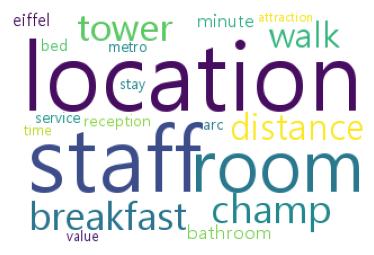

Castille Paris Starhotels Collezione :


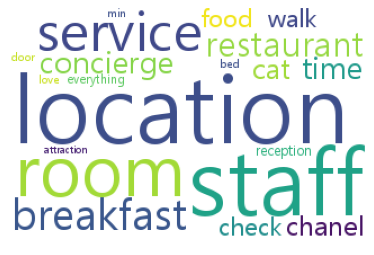

Amp re :


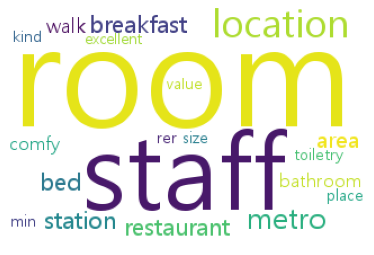

La Chambre du Marais :


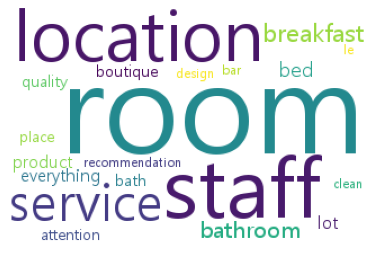

Royal Hotel Champs Elys es :


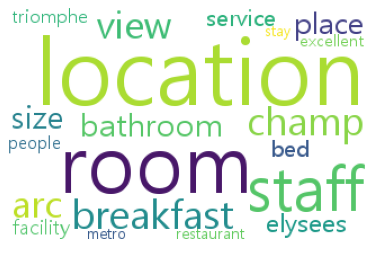

Franklin Roosevelt :


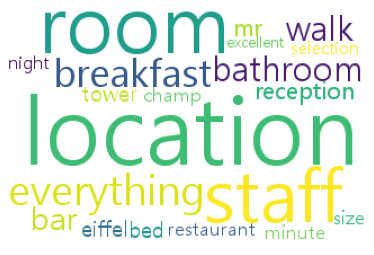

My Home In Paris :


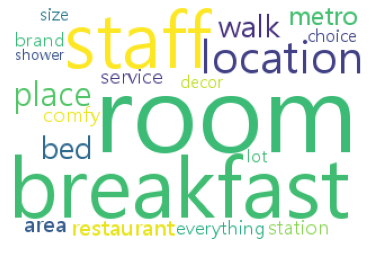

Forest Hill Paris la Villette :


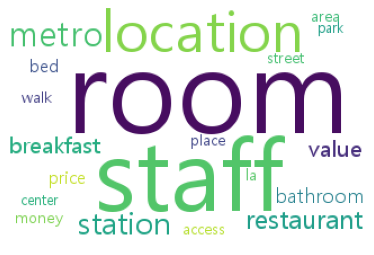

Hotel Maison FL :


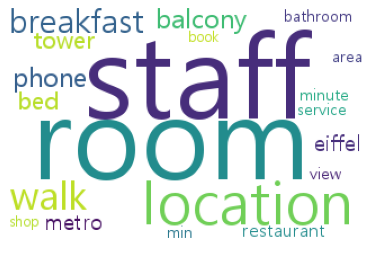

Artus Hotel by MH :


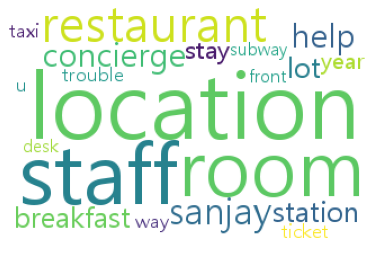

< TOP 20 Keywords with Positive Reviews >

H tel Beauchamps :


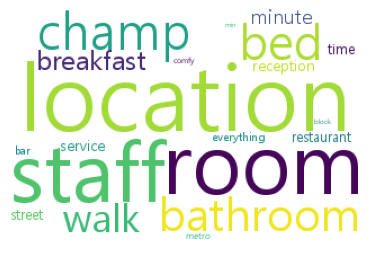

Saint James Albany Paris Hotel Spa :


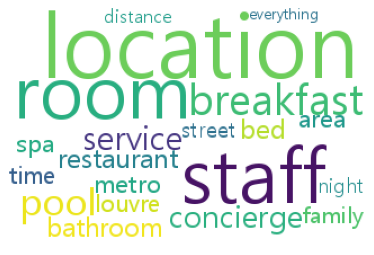

Holiday Inn Paris Saint Germain des Pr s :


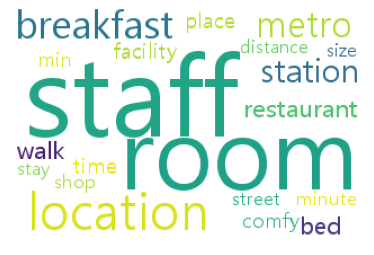

H tel Juliana Paris :


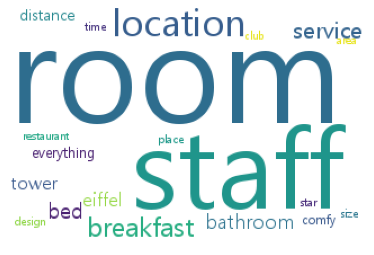

Montfleuri :


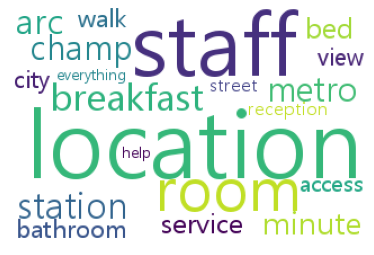

Newhotel Roblin :


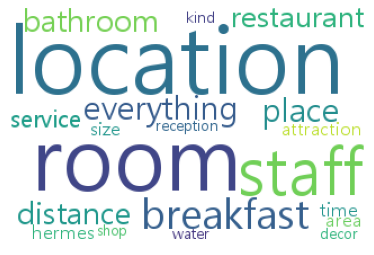

COQ Hotel Paris :


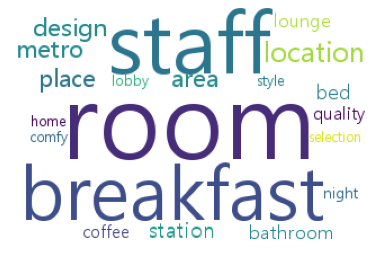

Novotel Suites Paris Expo Porte de Versailles :


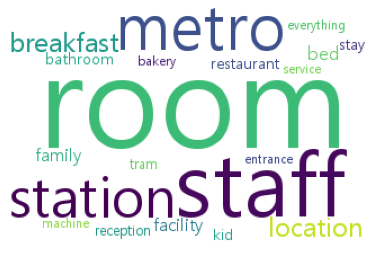

Hotel Ares Eiffel :


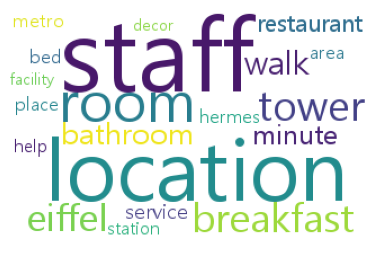

Hotel du Louvre in the Unbound Collection by Hyatt :


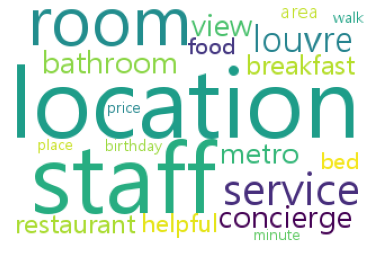

In [28]:
recommended_hotels_wordcloud(input_data2)
recommended_hotels_wordcloud(similar_data2)

### 시각화

In [29]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import folium
from folium.features import DivIcon
import webbrowser

In [30]:
a = input_data['lat'].mean()
b = input_data['lng'].mean()
center = [a, b]
m = folium.Map(center, zoom_start= 13, tiles = 'Stamen Terrain')

# folium.Marker([coordinate[0], coordinate[1]],
#               popup = '<' + name[:-1] +'>' + '\n' +  '2020년 거래량:' + '\n'+ str(df2.loc[name[:-1], '2020년'])
#              ).add_to(map)
# map

name_list = []
for i in range(10):
    name = input_data.iloc[i, :].name
    lat = input_data.iloc[i, :]['lat']
    lng = input_data.iloc[i, :]['lng']
    url = 'https://www.google.com/maps/place/' + name
    folium.Marker([lat, lng], tooltip = name, popup = url, icon = folium.Icon(color = 'black',icon = 'info-sign')).add_to(m)
    lat = similar_data.iloc[i, :]['lat']
    lng = similar_data.iloc[i, :]['lng']
    folium.Marker([lat, lng], tooltip = name, popup = url, icon = folium.Icon(color = 'red',icon = 'info-sign')).add_to(m)
    name_list.append(name)

m.save('map.html')

In [51]:
# j = '<p> - {} : / Reservation site : {}</p>'.format(name_list[9], 'https://www.google.co.kr/maps/search/' + name_list[9])
# def visualize():
#     for i in range(10):
#         globals()['a_{}'.format(i)] = '<p> - {} : / Reservation site : {}</p>'.format(name_list[i], 'https://www.google.co.kr/maps/search/' + name_list[i])
#         globals()['b_{}'.format(i)] = '<p> - {} : / Reservation site : {}</p>'.format(similar_list[i], 'https://www.google.co.kr/maps/search/' + similar_list[i])

#     message = """<!doctype html><html lang="ko"><head><meta charset="utf-8"><title>기본 HTML 문서</title></head>
#     <body><h1>OUR TOP 10 RECOMMENDATIONS FOR YOU</h1>{}{}{}{}{}{}{}{}{}{}<h1>YOU WANNNA LOOK AROUND MORE?<br>CHECK ADDITIONAL HOTELS WITH SIMILAR REVIEWS!</h1>{}{}{}{}{}{}{}{}{}
#     </body></html>""".format(a_0, a_1, a_2, a_3, a_4, a_5, a_6, a_7, a_8, a_9, b_0, b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9)


#     filepath = "hello.html"
#     with open(filepath, 'w', encoding = 'UTF-8') as f:
#         f.write(message)
#         f.close()
 
#     webbrowser.open_new_tab(filepath)
#     webbrowser.open_new_tab('map.html')

In [31]:
def visualize():
    for i in range(10):
        globals()['a_{}'.format(i)] = '<p> - {} : / Reservation site : {}</p><img src="image_{}.png">'.format(
            name_list[i], 'https://www.google.co.kr/maps/search/' + name_list[i], i)
        globals()['b_{}'.format(i)] = '<p> - {} : / Reservation site : {}</p><img src="image_{}.png">'.format(
            similar_list[i], 'https://www.google.co.kr/maps/search/' + similar_list[i], i + 10)

    message = """<!doctype html><html lang="ko"><head><meta charset="utf-8"><title>Main</title></head>
    <body><h1>INFORMATION FOR HOTEL</h1>{}{}{}{}{}{}{}{}{}{}<h1>Find the similar review Hotel!!</h1>{}{}{}{}{}{}{}{}{}
    </body></html>""".format(a_0, a_1, a_2, a_3, a_4, a_5, a_6, a_7, a_8, a_9, b_0, b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9)


    filepath = "hello.html"
    with open(filepath, 'w', encoding = 'UTF-8') as f:
        f.write(message)
        f.close()
 
    webbrowser.open_new_tab(filepath)
    webbrowser.open_new_tab('map.html')

In [32]:
visualize()